In [2]:
# importing all the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading the dataset
train = pd.read_csv("train.csv", encoding = 'utf-8')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Check the dimensions
train.shape

(1460, 81)

In [5]:
# Check for column details
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# To get the description of the dataset
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
#checking duplicates
sum(train.duplicated(subset = 'Id')) == 0

True

In [8]:
# Checking for percentage nulls
round(100*(train.isnull().sum()/len(train.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

### Outlier Check

In [9]:
#Checking for outlier in the numerical columns
train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

### Method to remove outliers.

In [10]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [11]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    data[i].fillna("none", inplace=True)

NameError: name 'data' is not defined

In [ ]:
# Check nulls once again

train.columns[data.isnull().any()] 

null_2 = train.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

In [12]:
#replacing with median
train["LotFrontage"].fillna(train["LotFrontage"].mean(), inplace=True)

train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mean(), inplace=True)
train["Electrical"].dropna(inplace=True)

In [13]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [14]:
null = pd.DataFrame(round(train.isnull().sum()/len(train.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
GarageFinish    5.55
GarageType      5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
Electrical      0.07

In [15]:
# Check the no. of rows retained
len(train.index)
len(train.index)/1460

1.0

## EDA And Visualistauon

In [16]:
train_num = train.select_dtypes(include=['float64', 'int64'])
train_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [17]:
# Dropping ID Column
train_num = train_num.drop(['Id'], axis=1)
train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

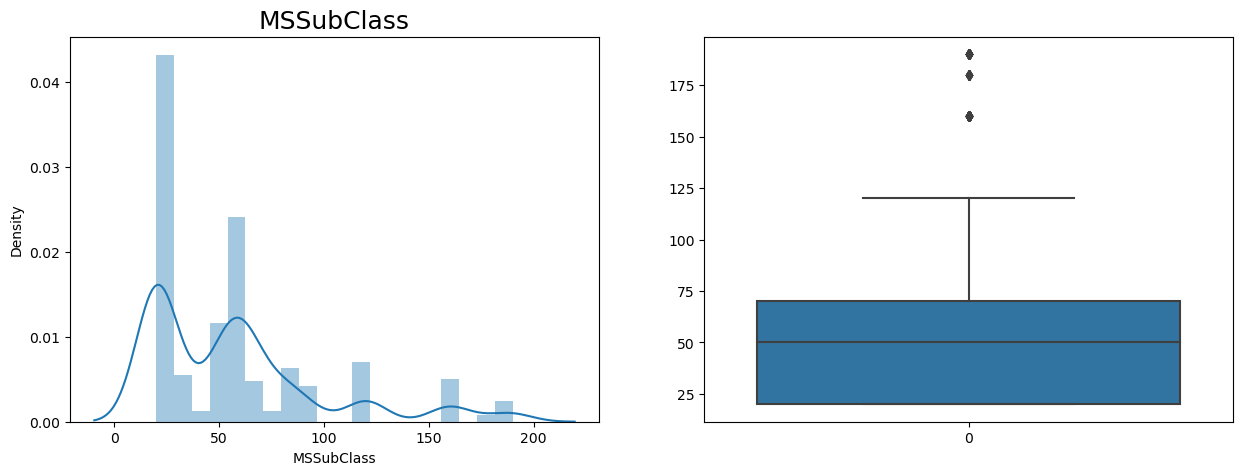

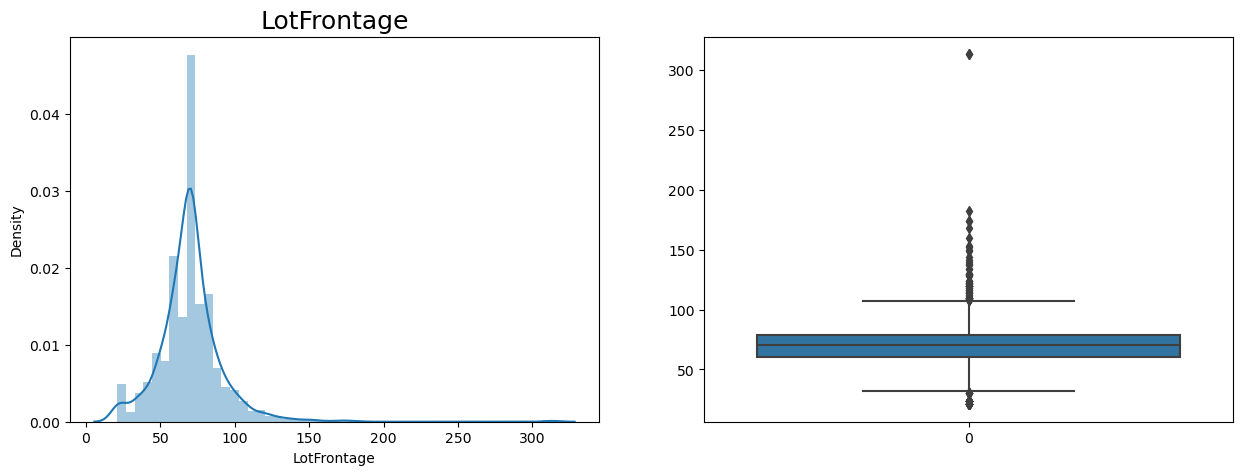

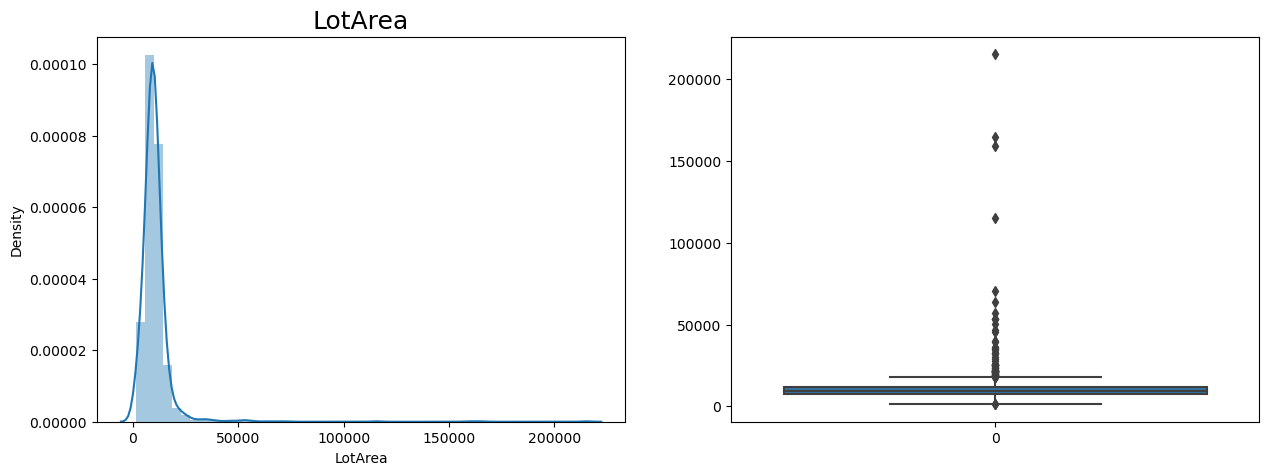

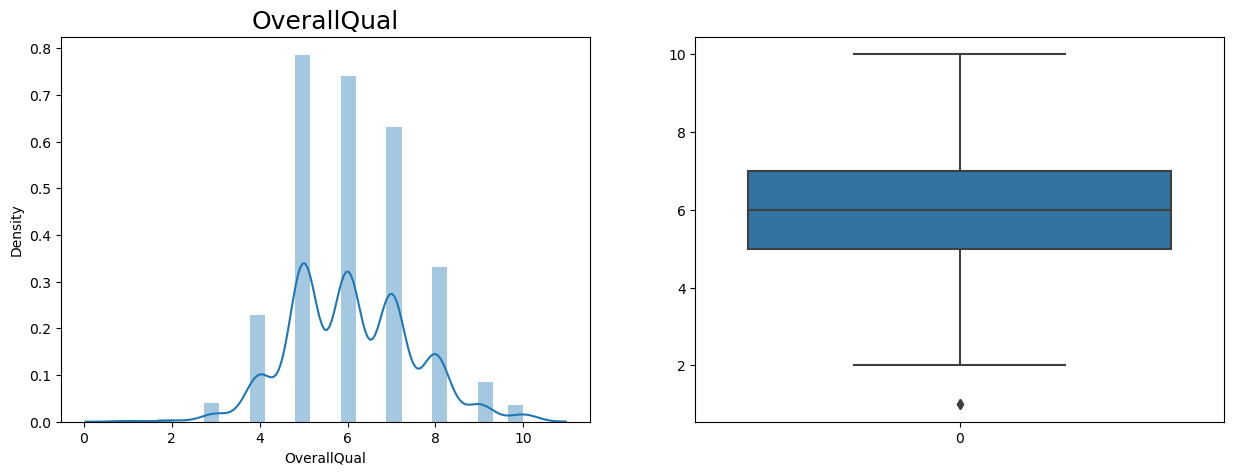

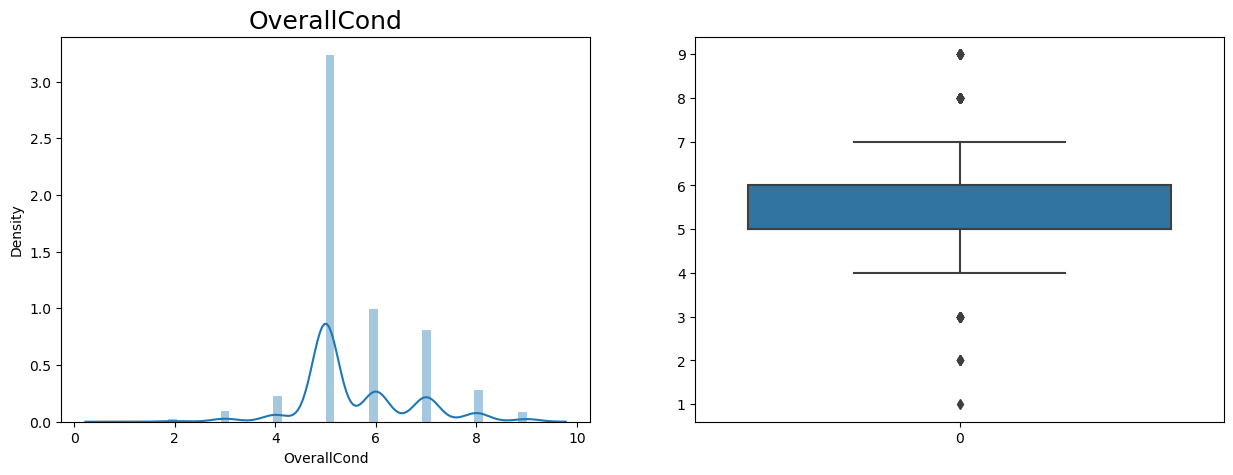

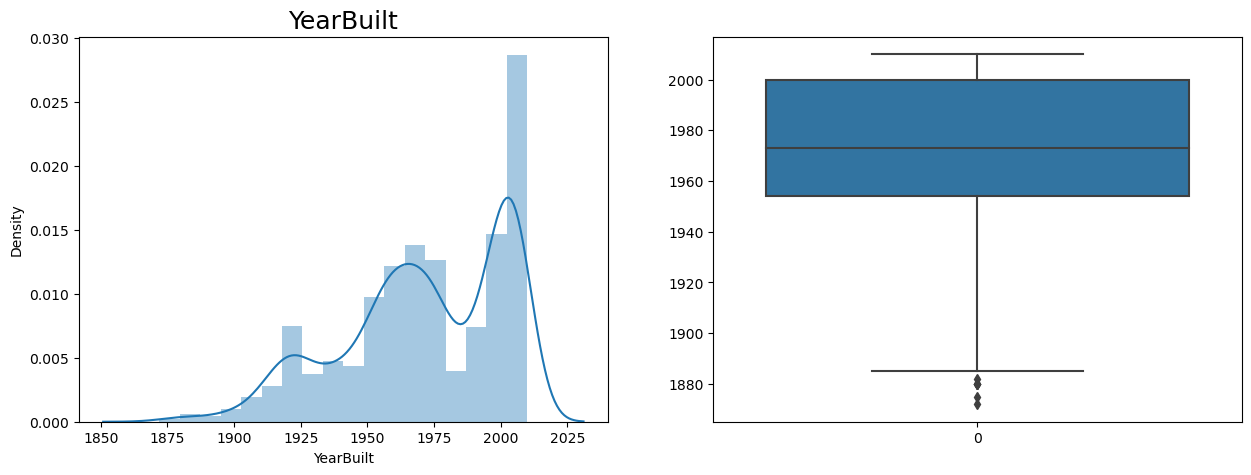

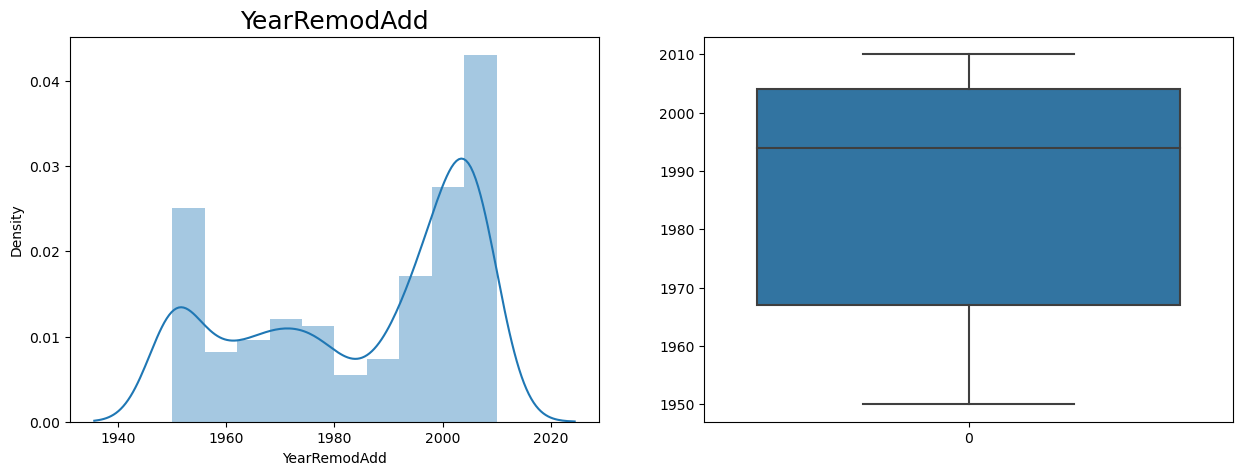

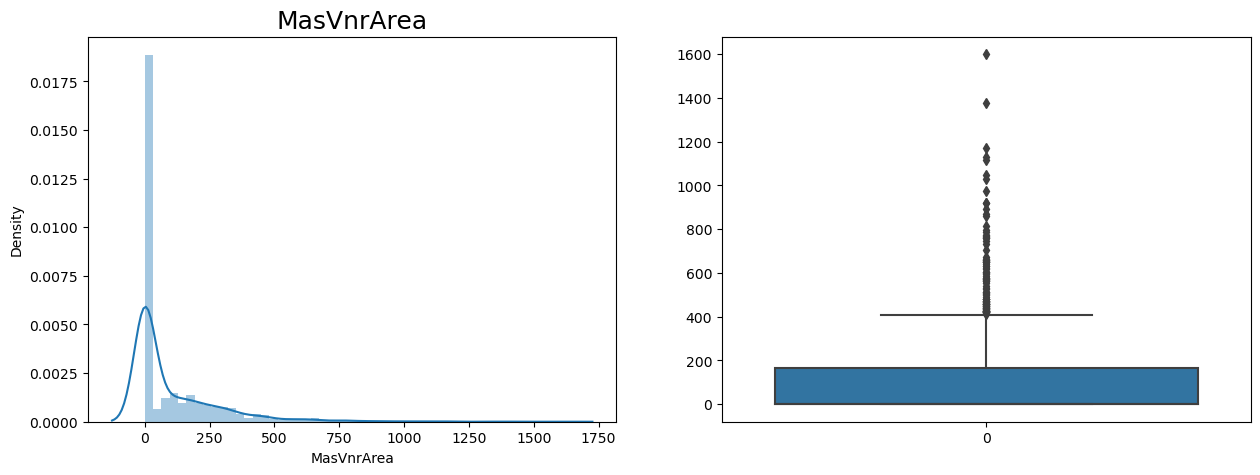

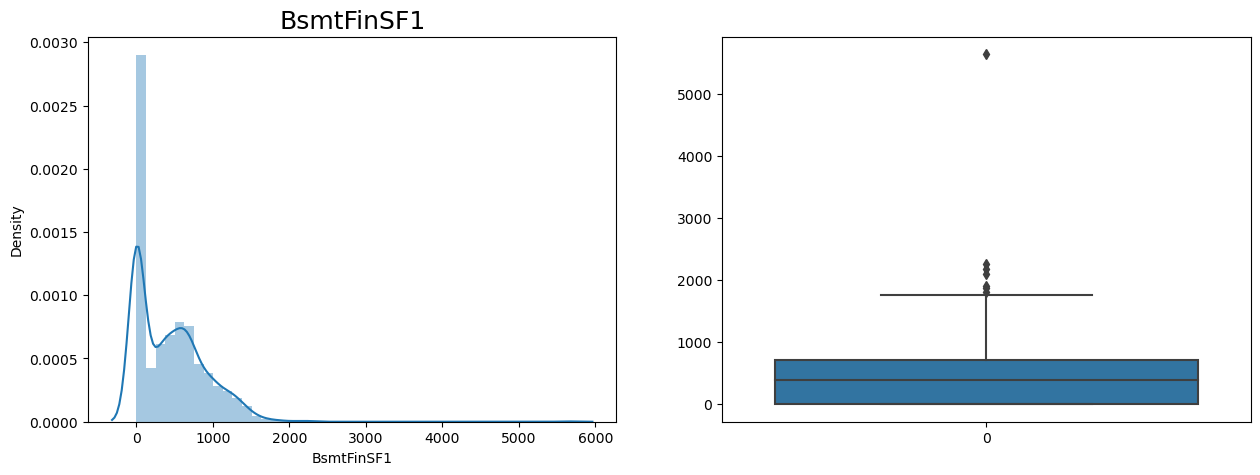

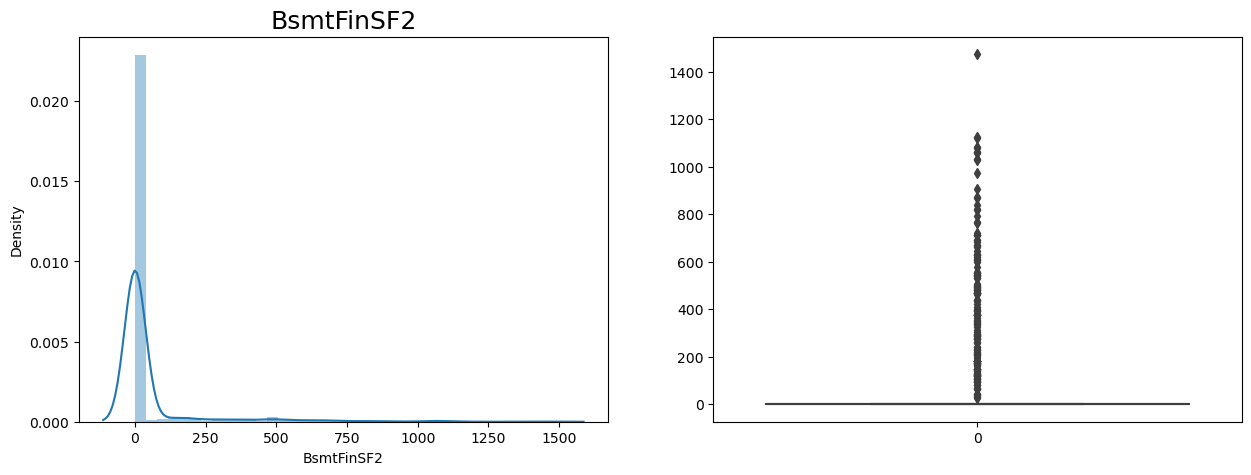

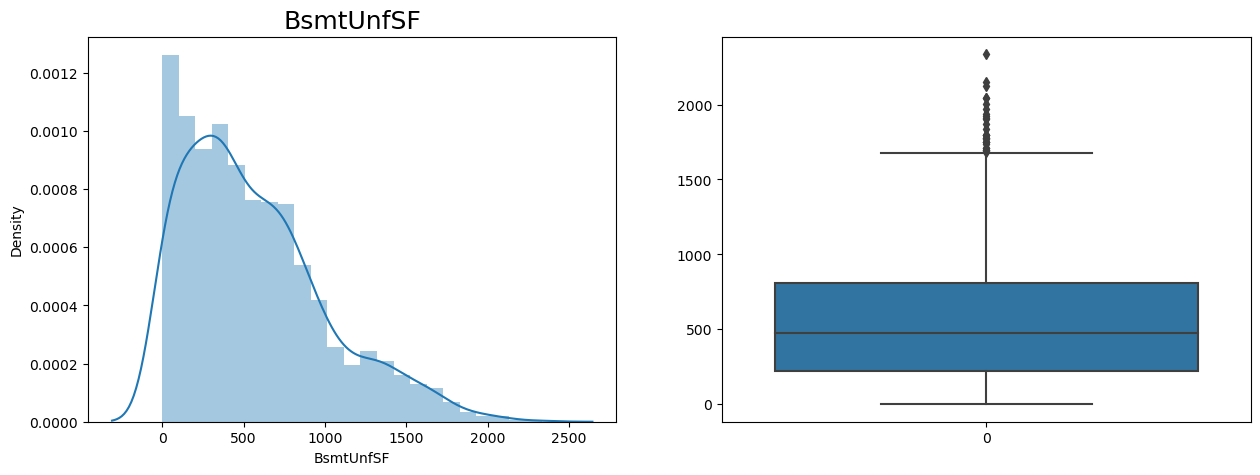

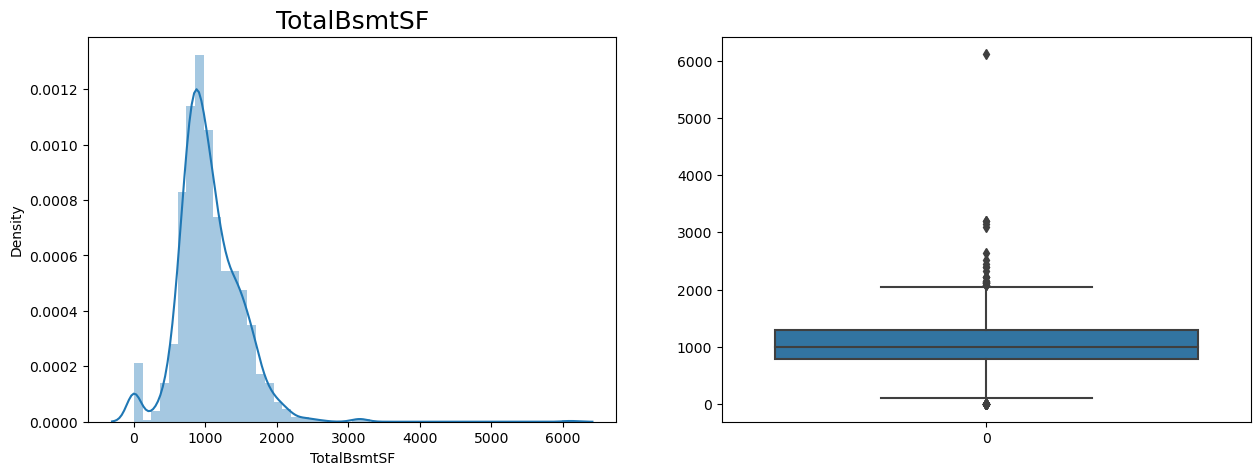

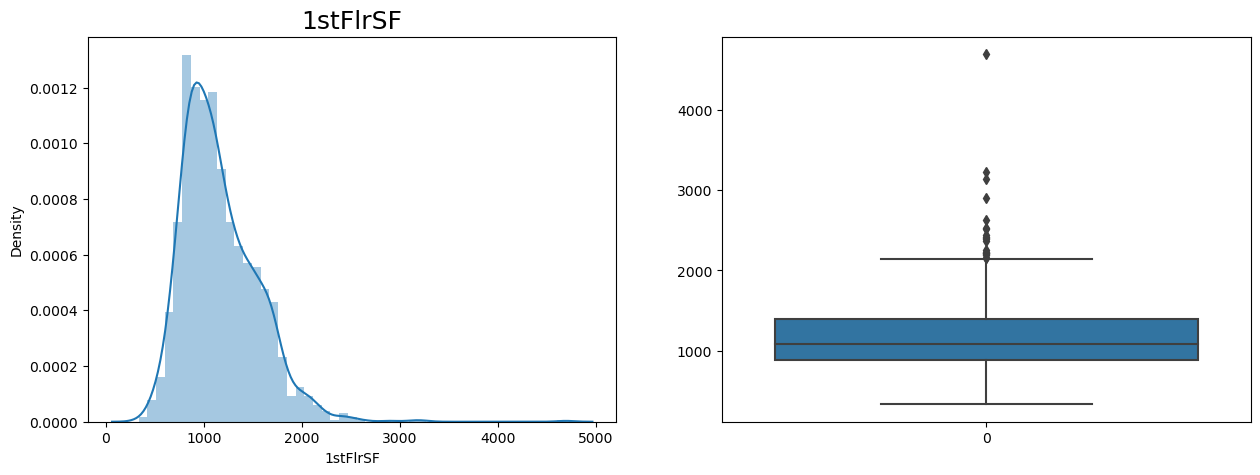

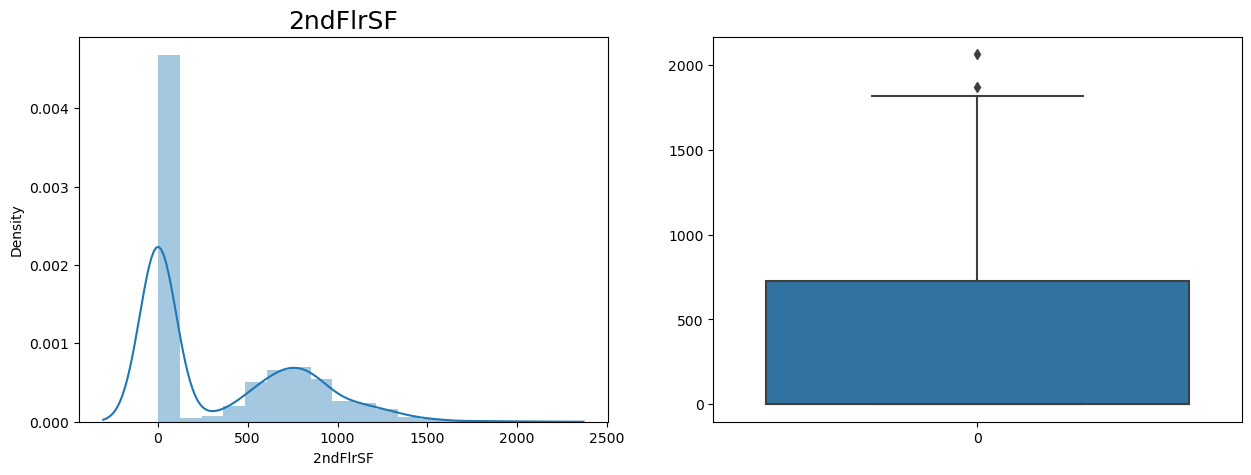

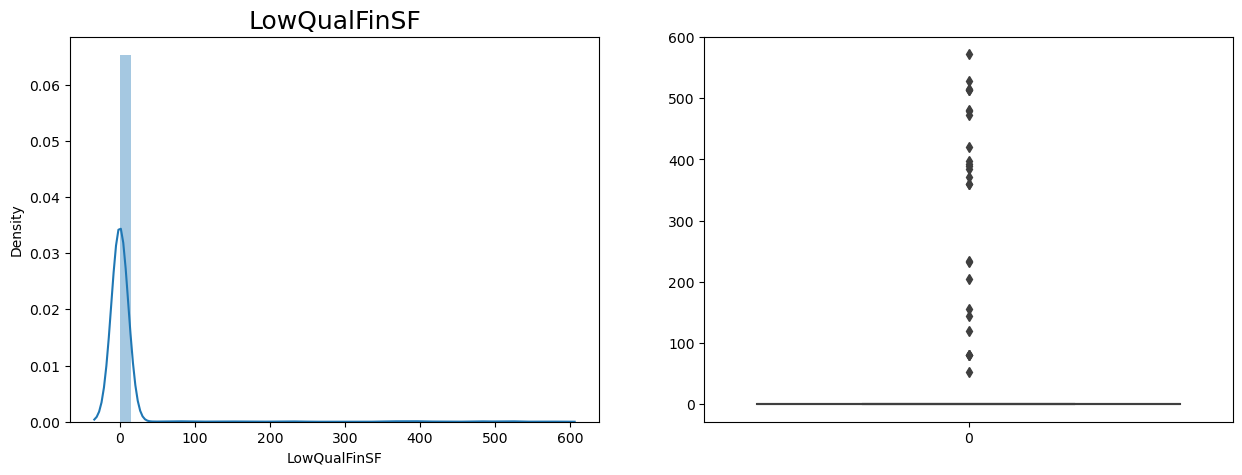

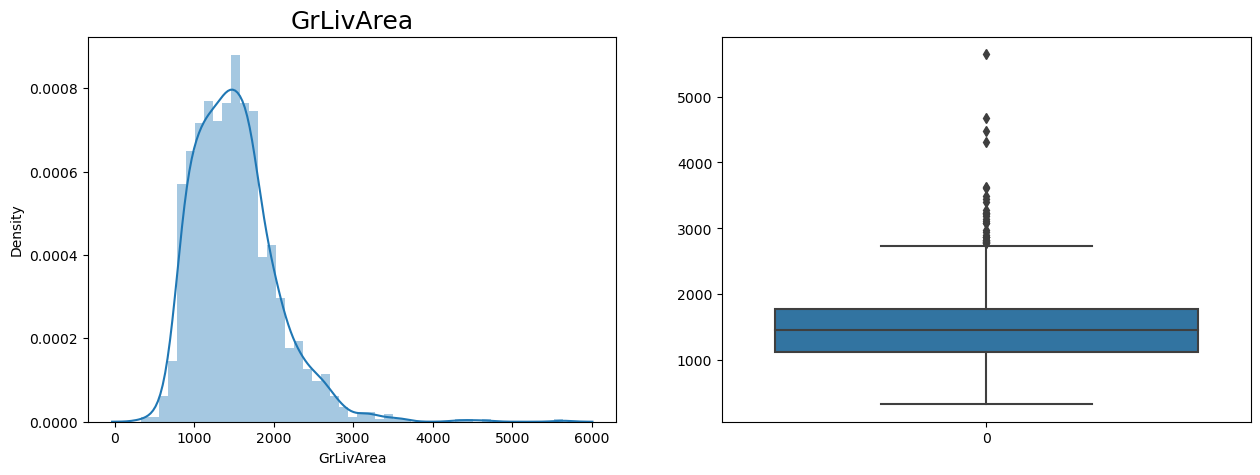

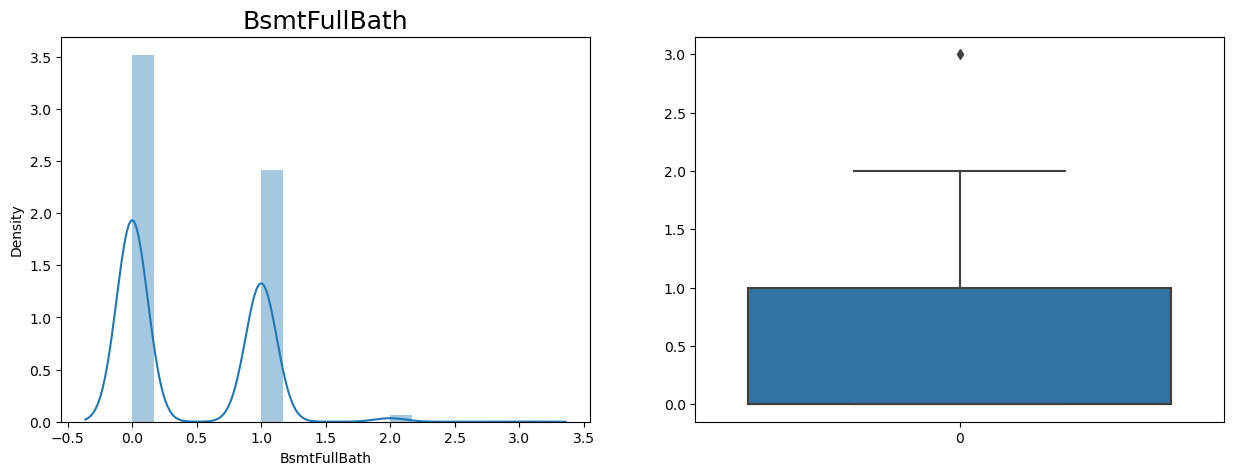

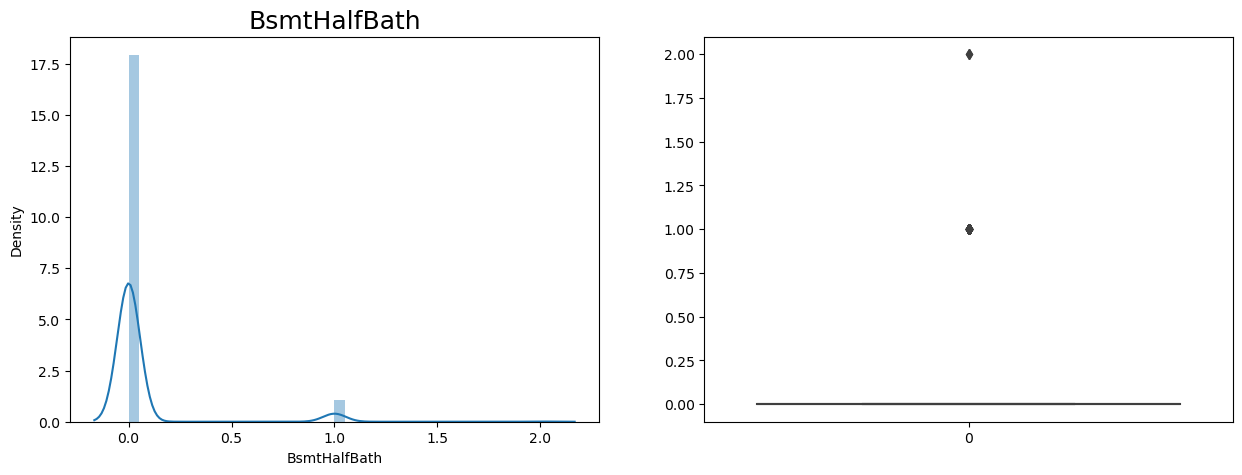

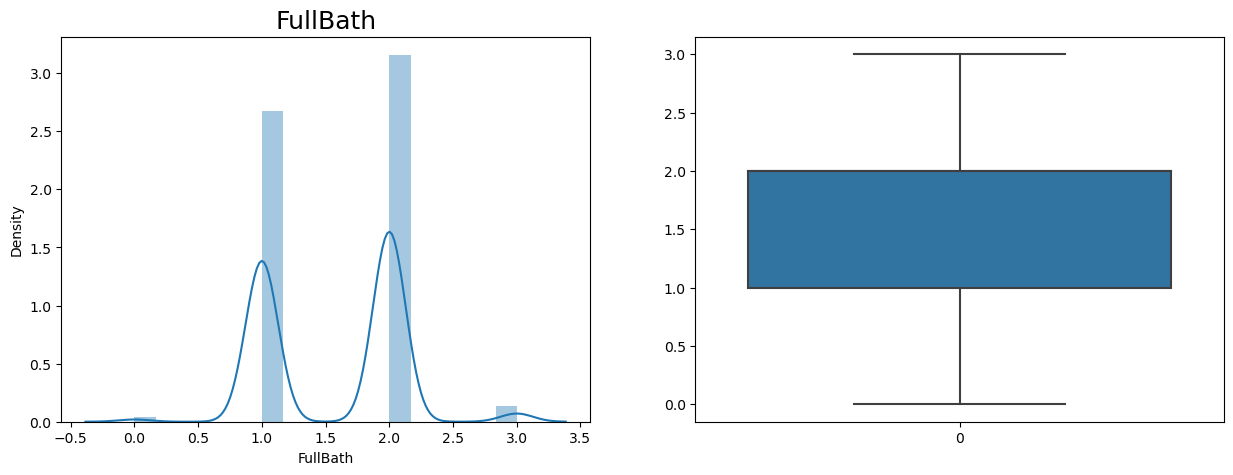

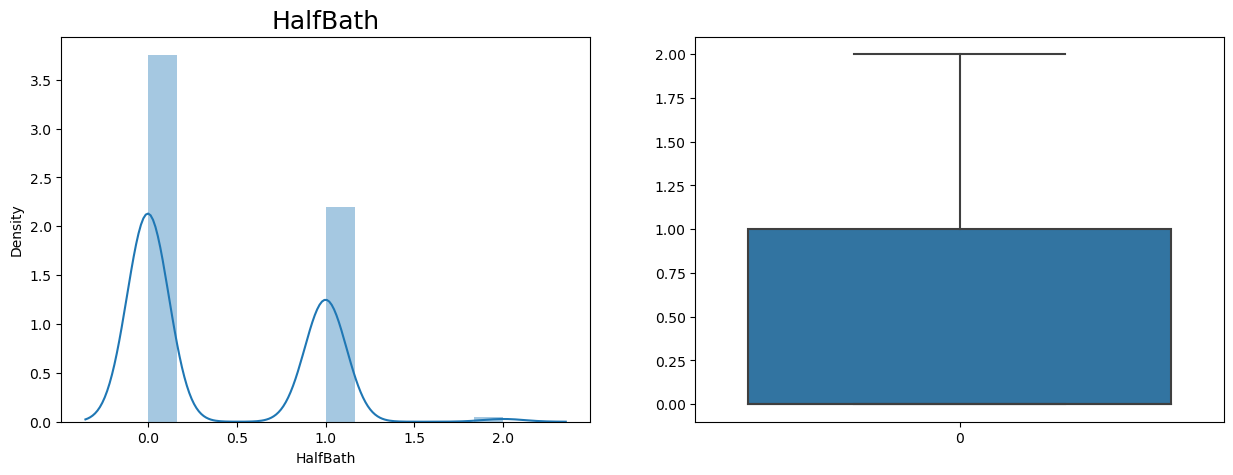

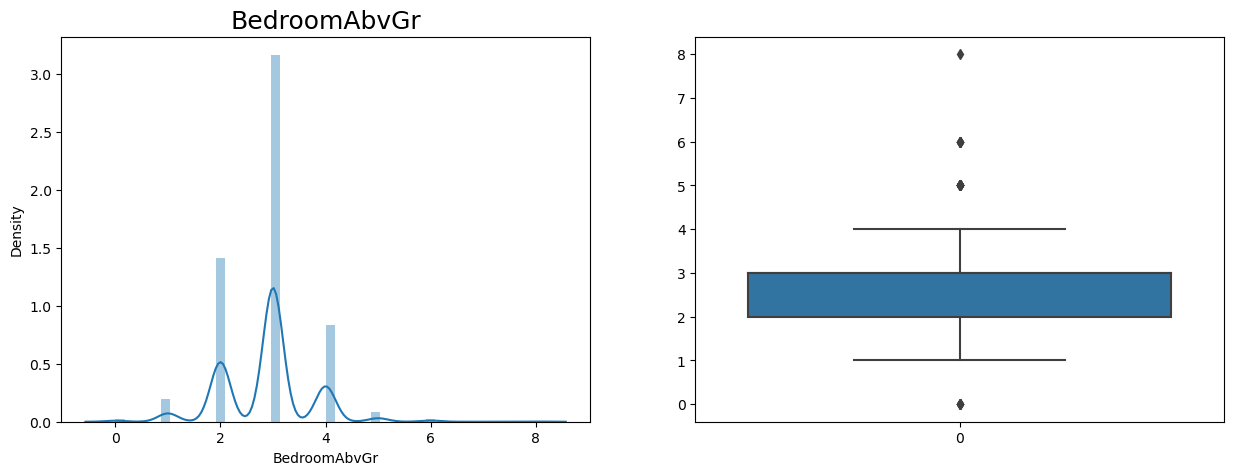

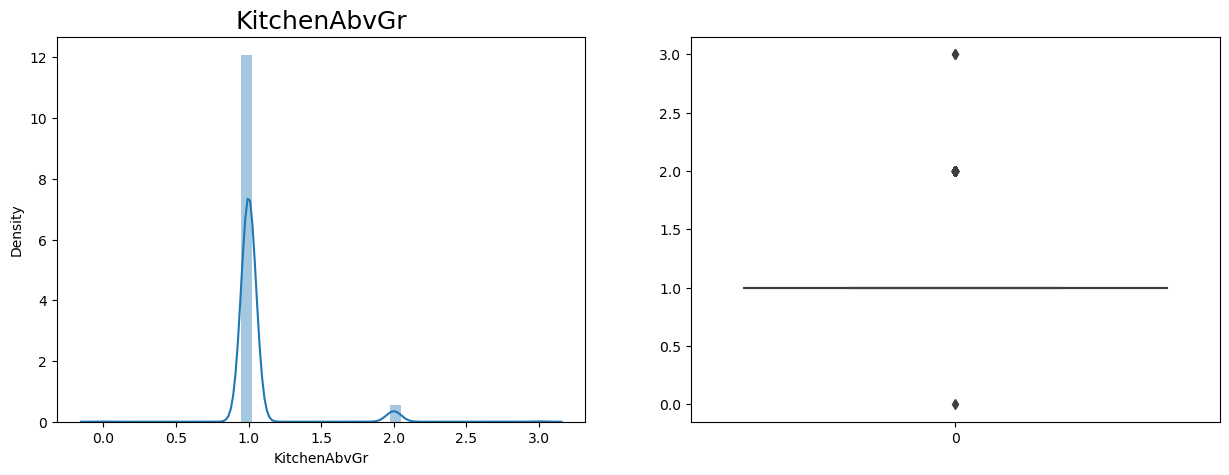

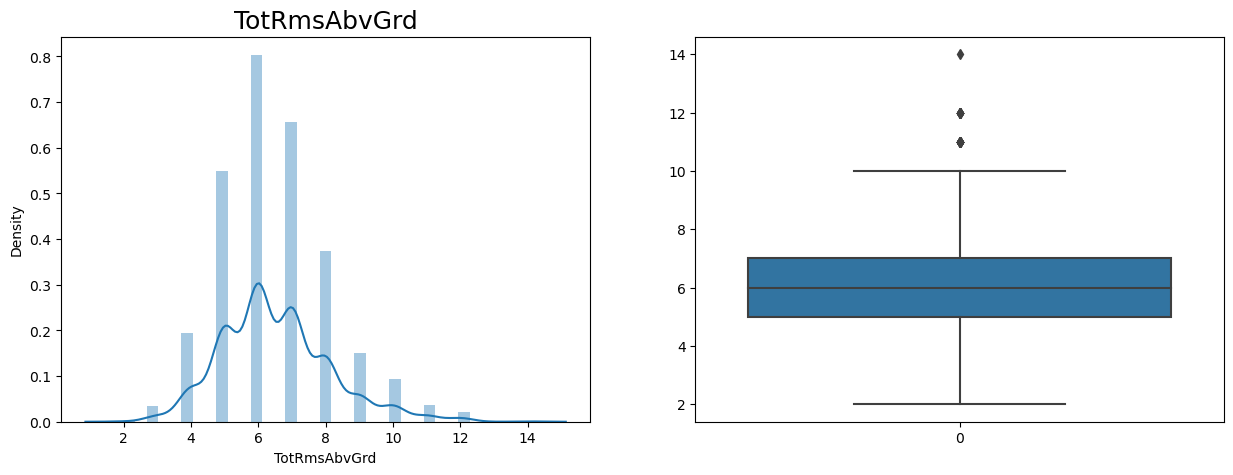

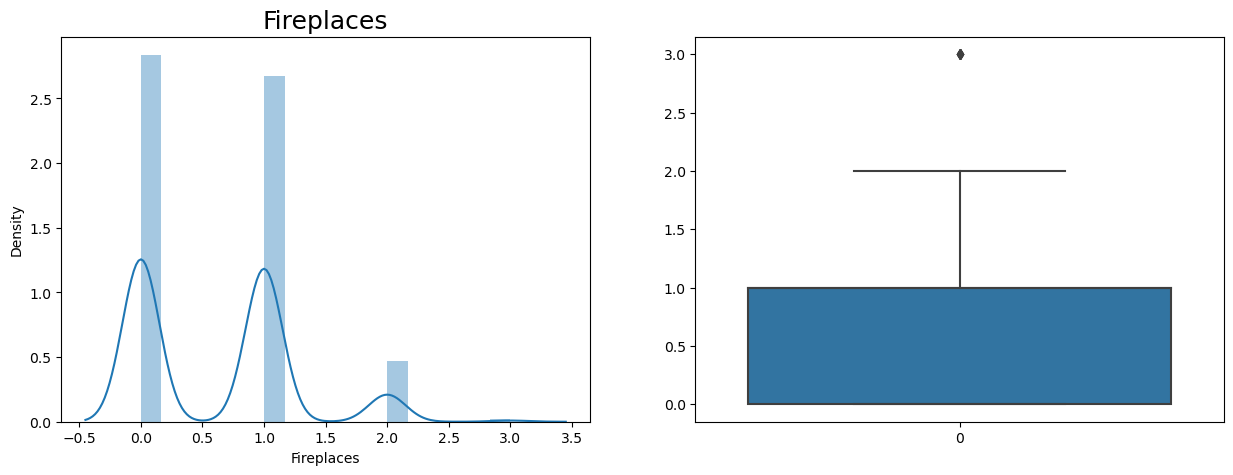

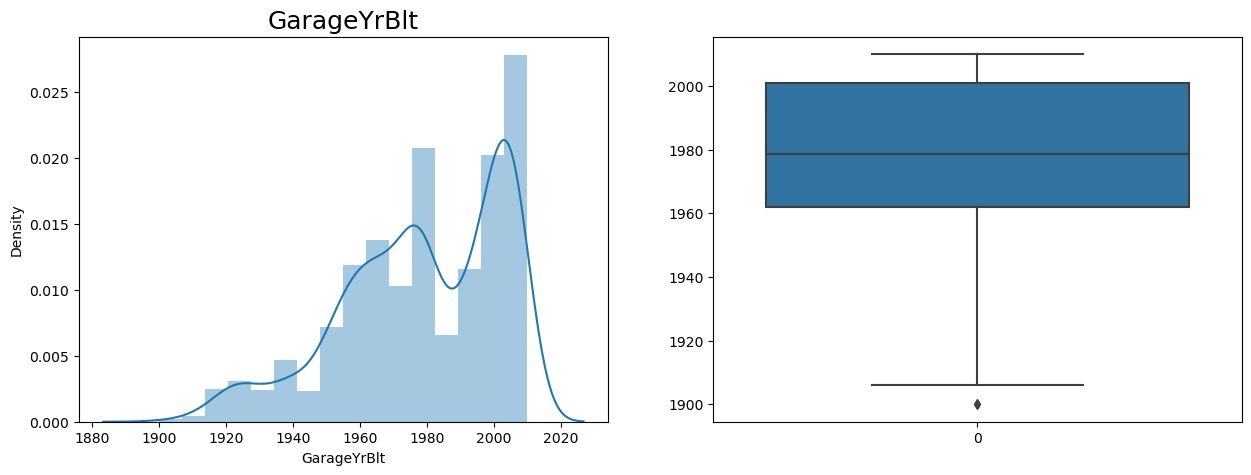

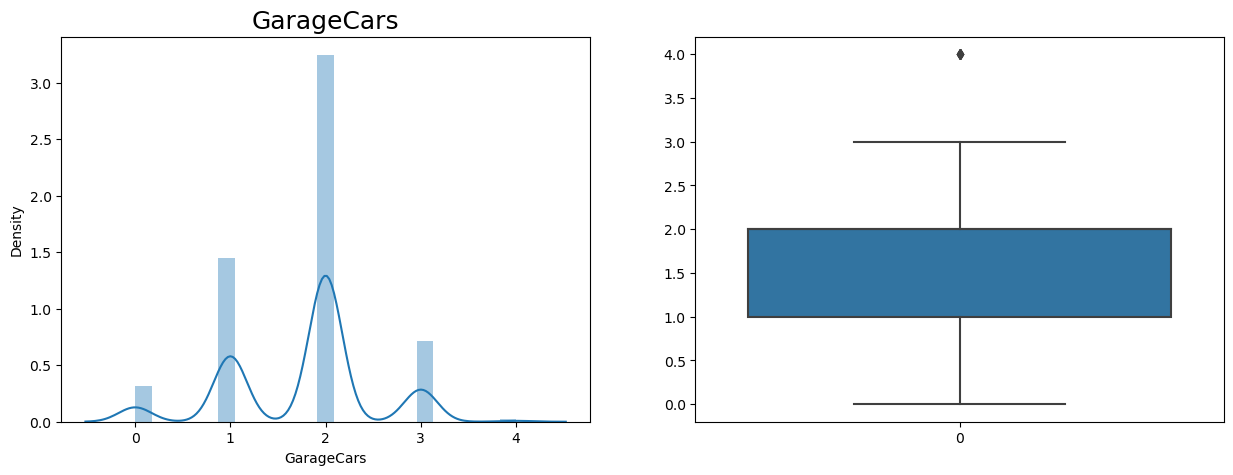

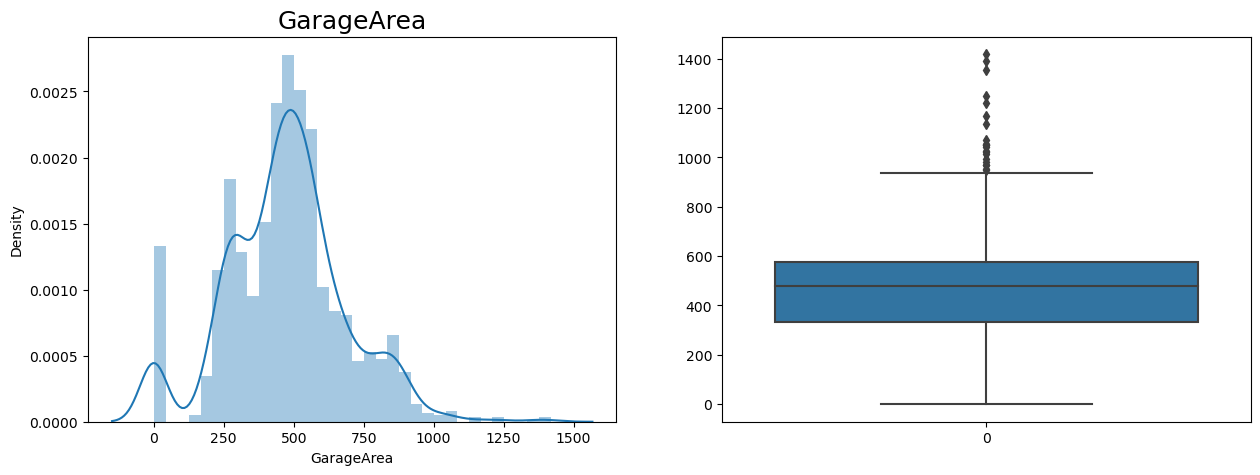

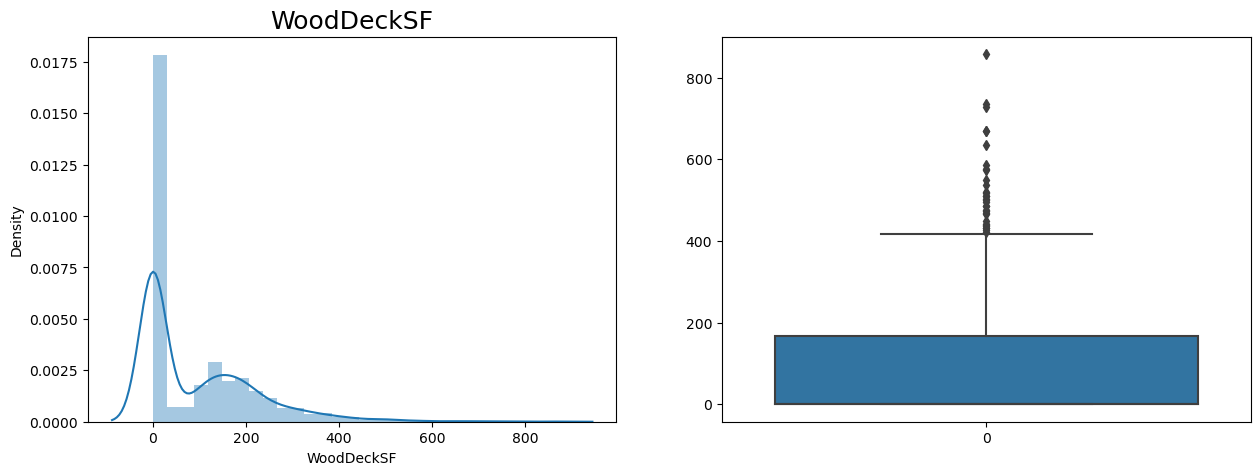

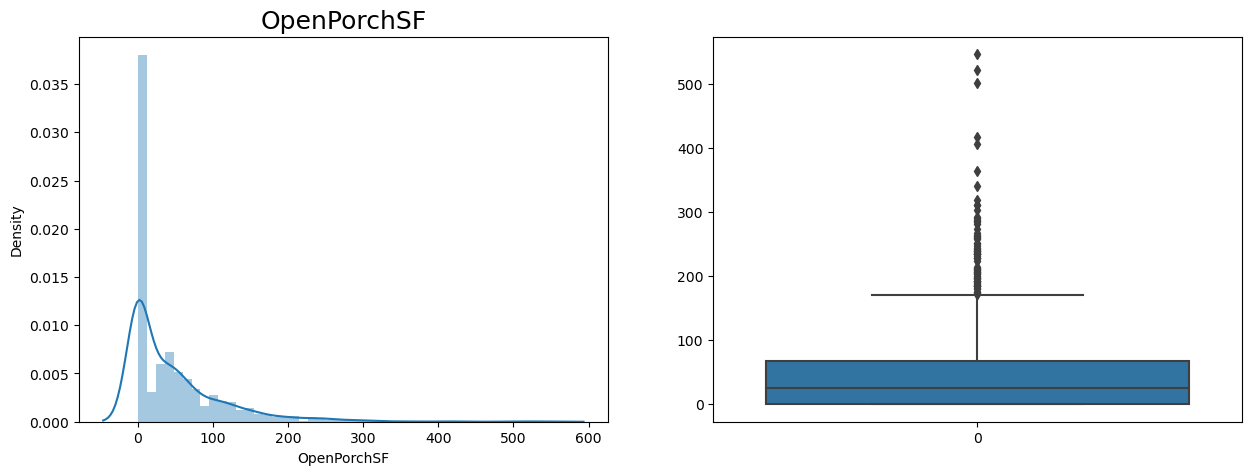

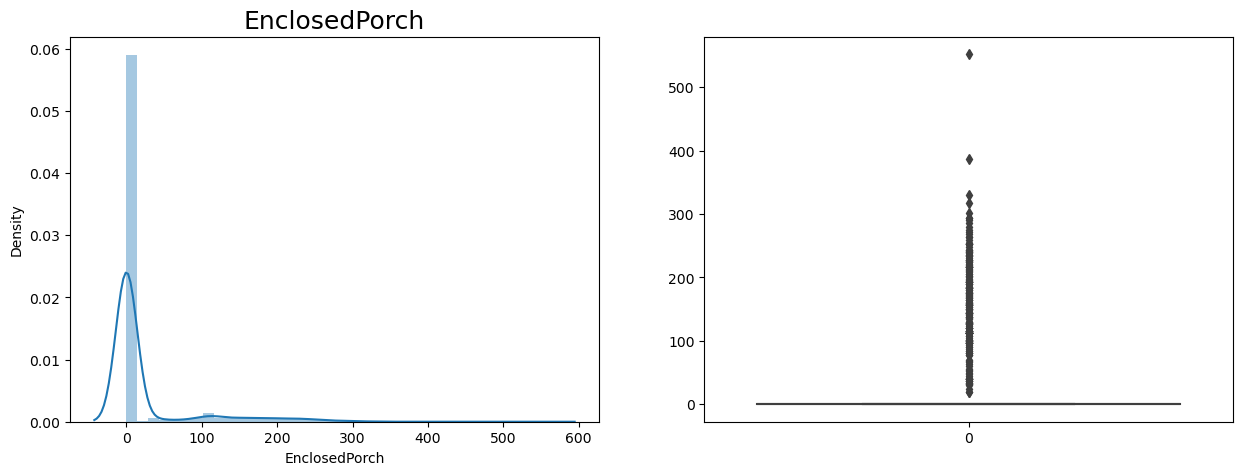

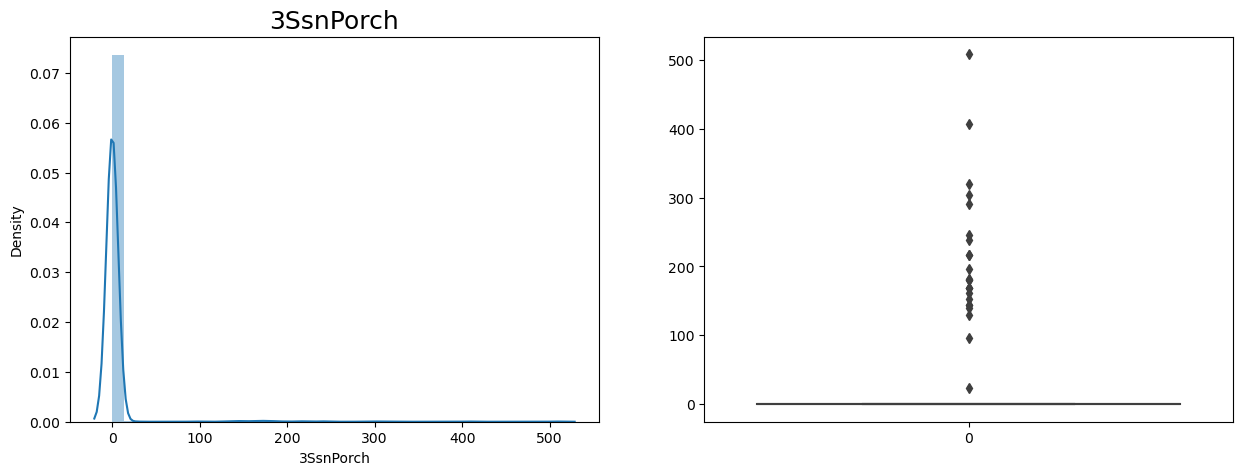

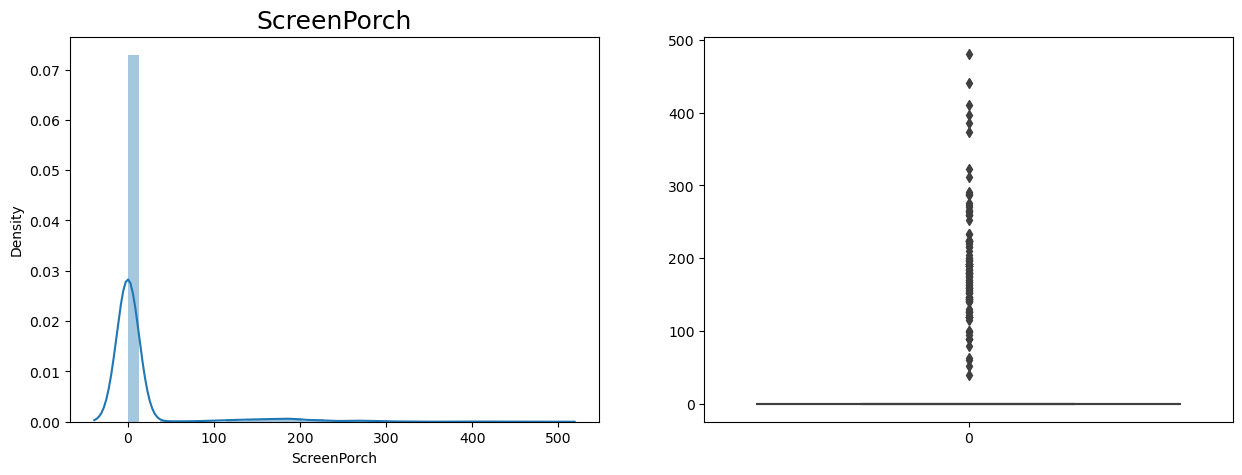

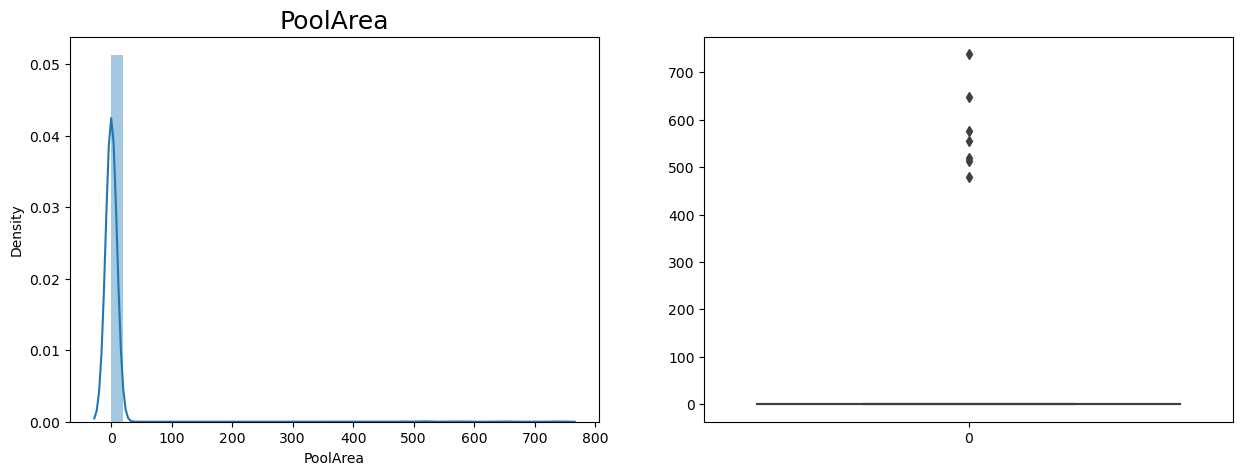

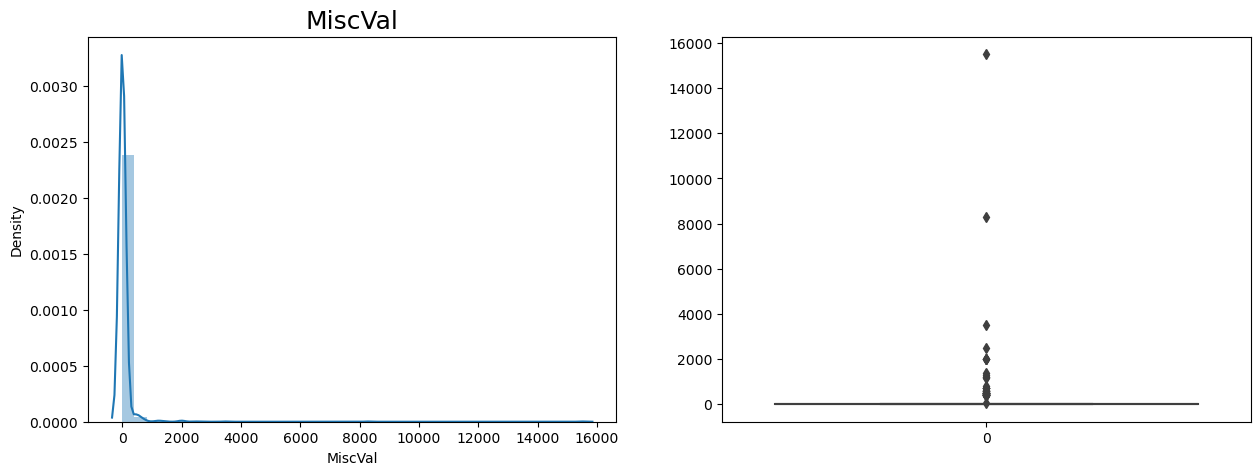

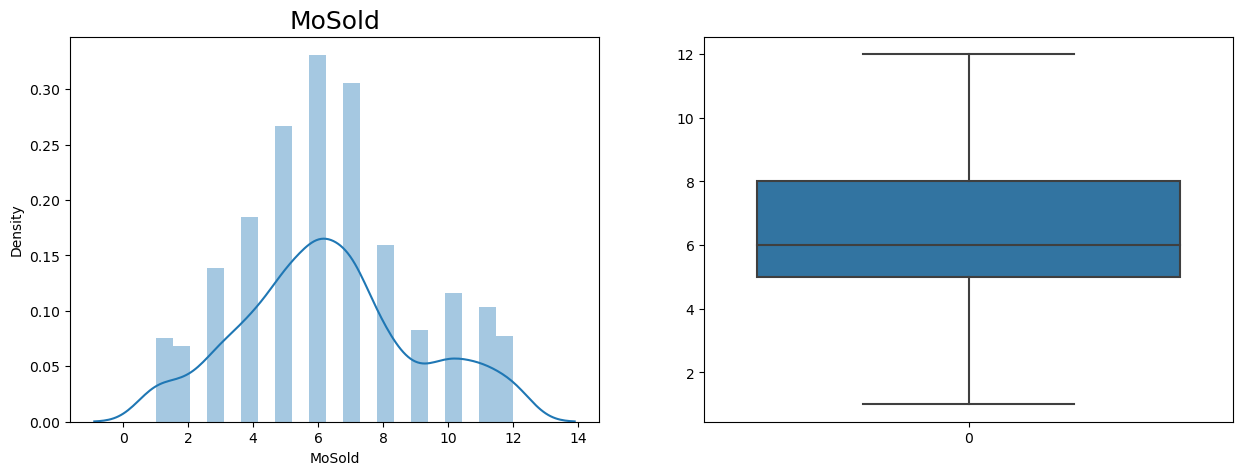

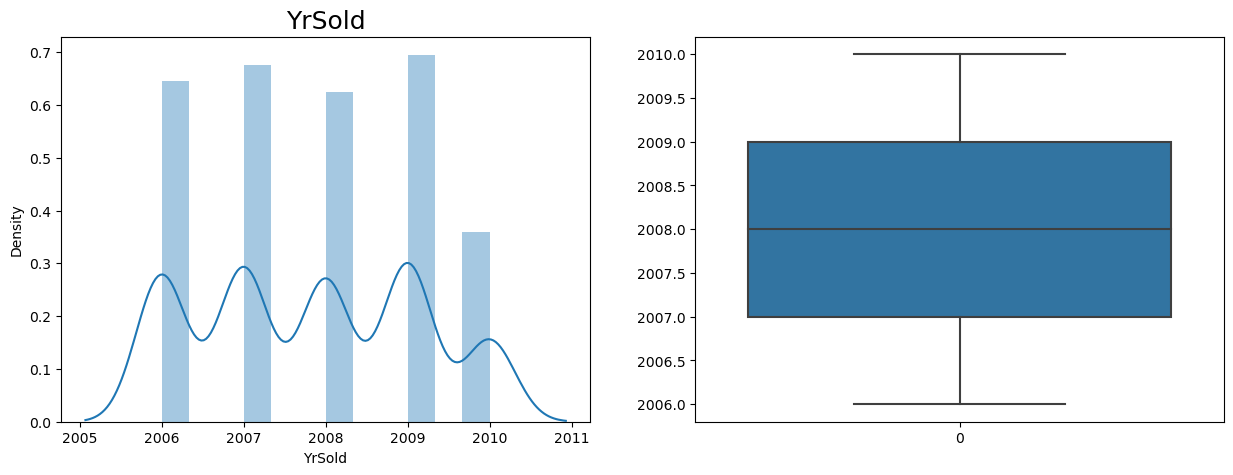

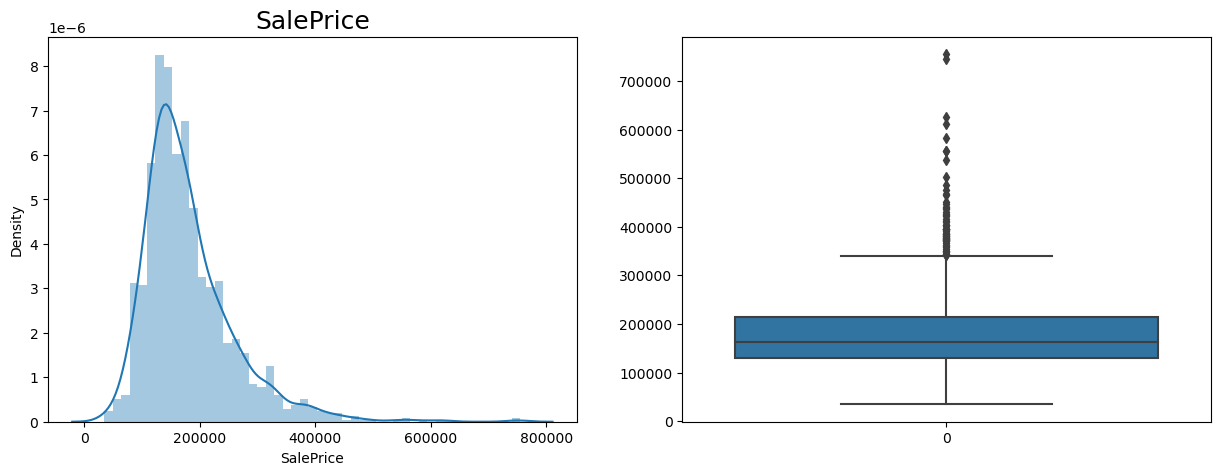

In [18]:
## View the distribution of all numeric variables using histograms and boxplots

for col in train_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(train_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(train_num[col])
    plt.show()  

#### Increase in the overall quality has a direct positive effect on the sale price

<Axes: xlabel='SalePrice', ylabel='Density'>

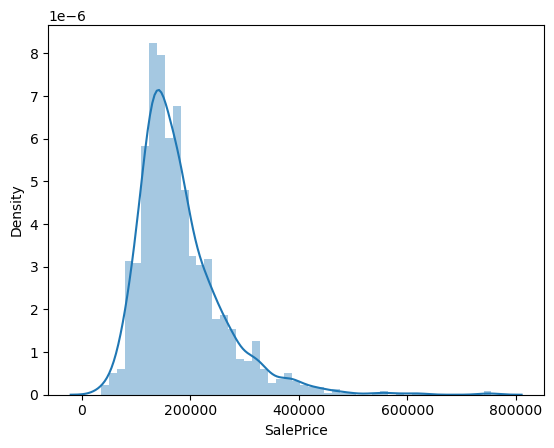

In [20]:
sns.distplot(train['SalePrice'])

In [21]:
train_ori = train.copy

### Applying log since the saleprice is skewed

In [22]:
#Log Transformation
train['SalePrice']=np.log1p(train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

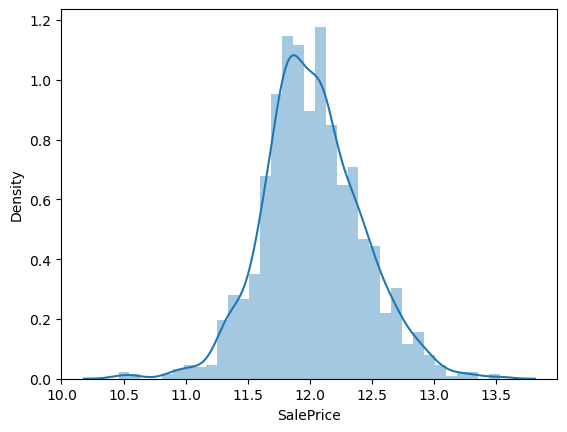

In [23]:
sns.distplot(train['SalePrice'])

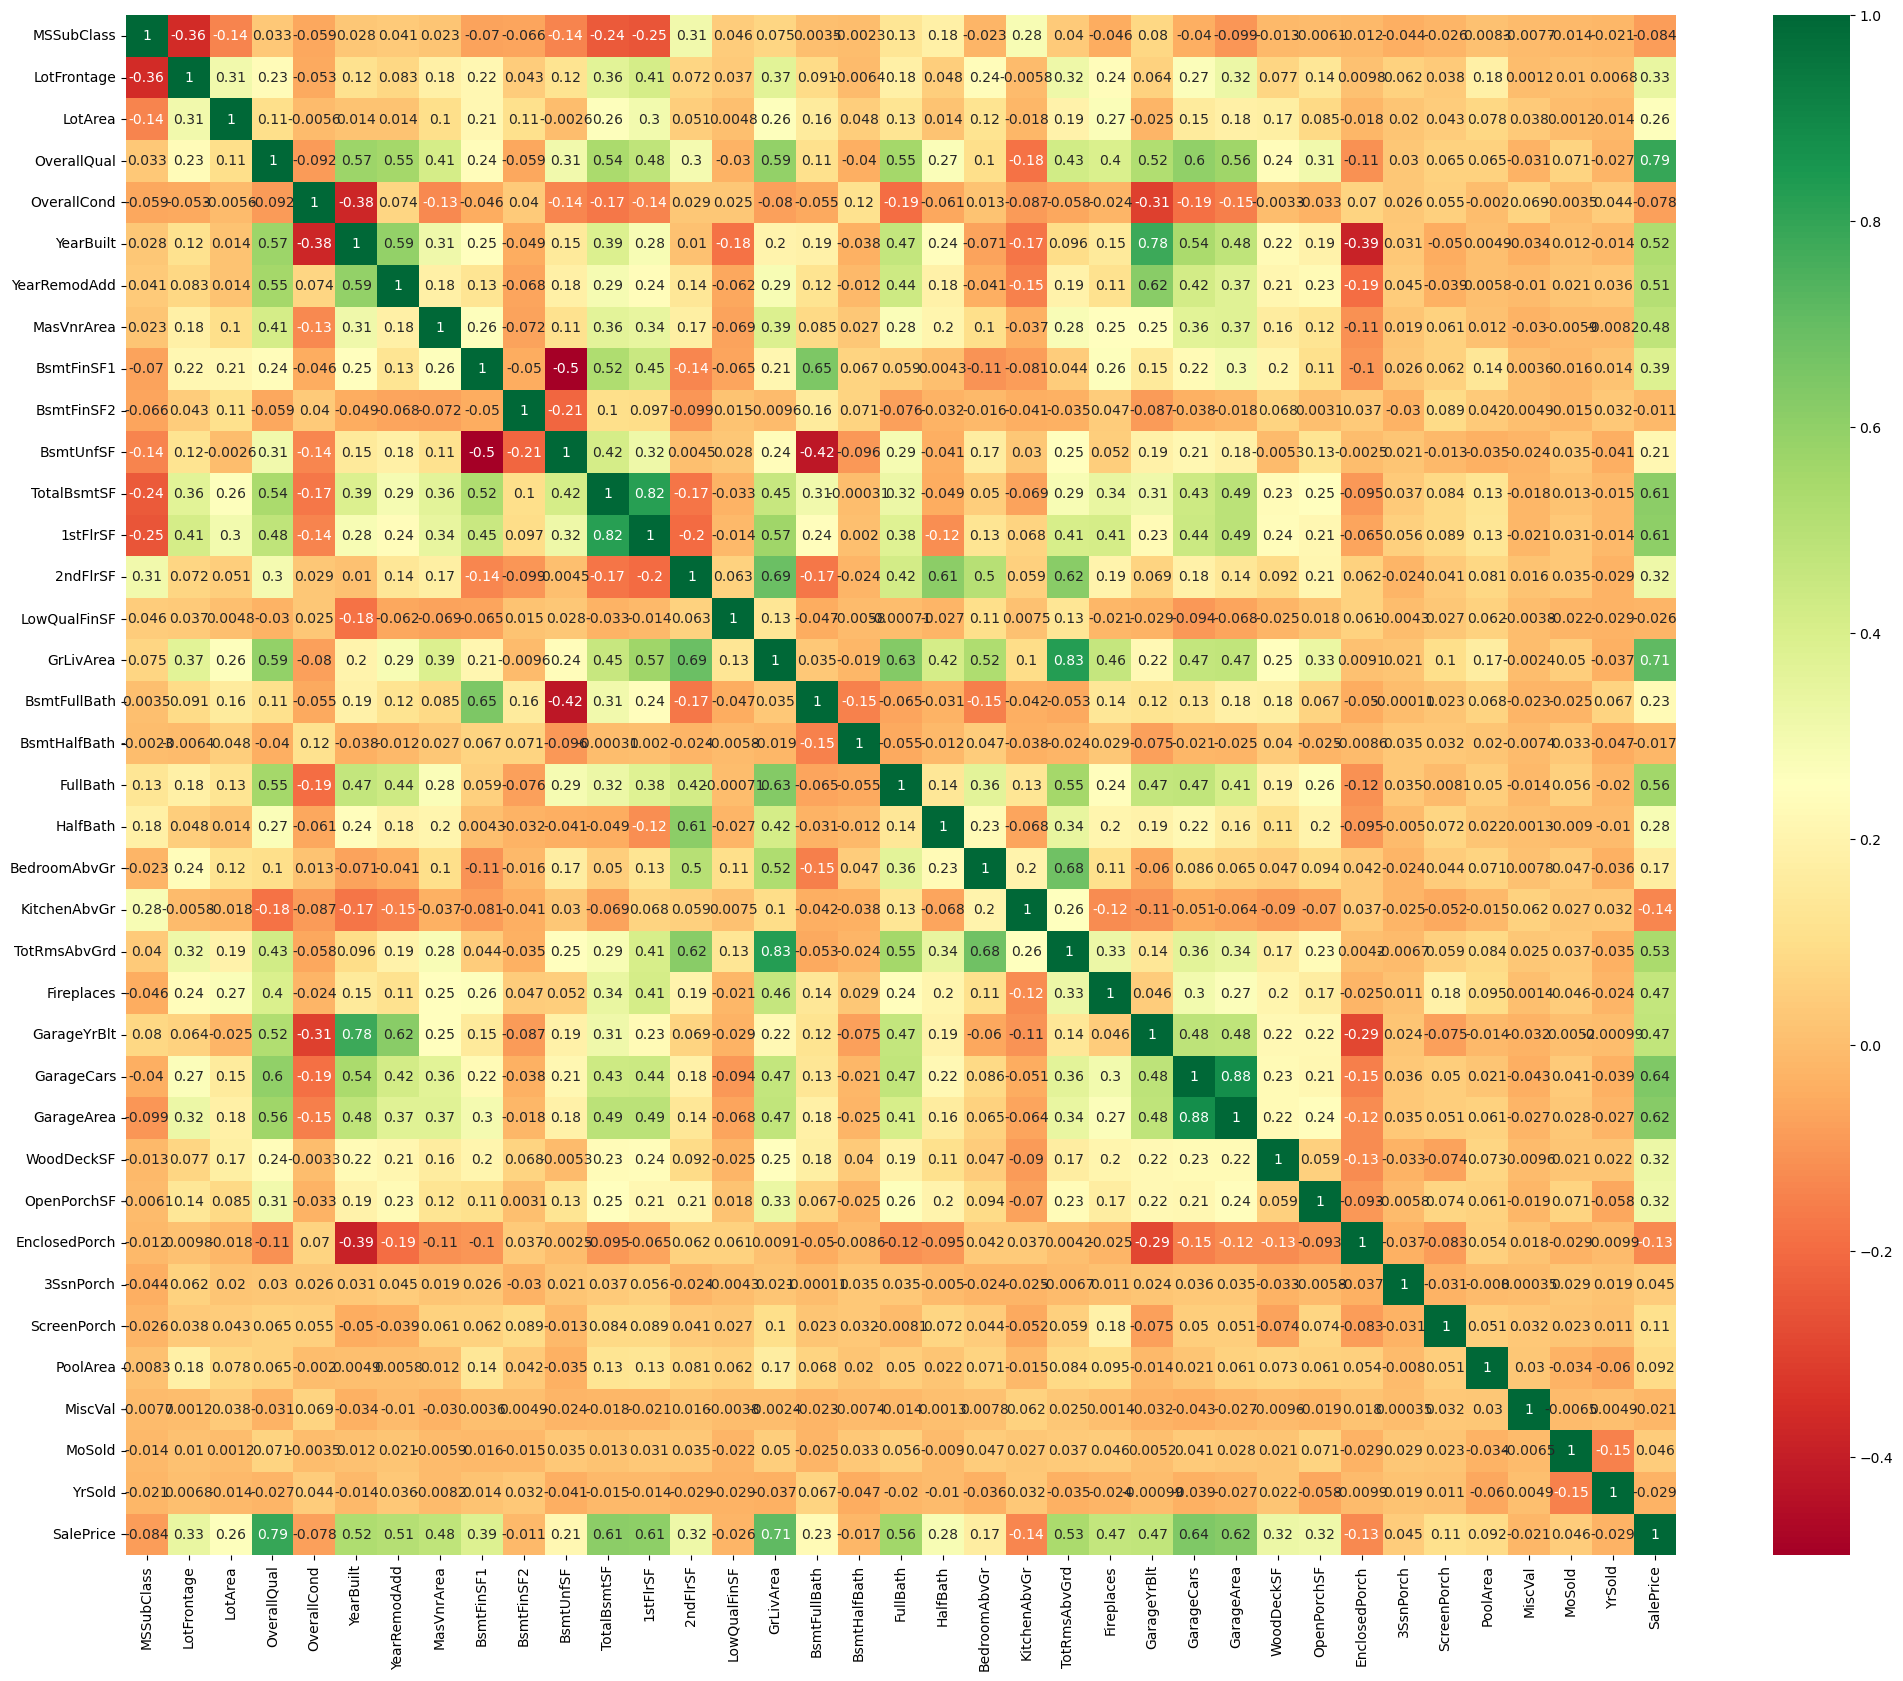

In [24]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(train_num.corr(), annot=True, cmap='RdYlGn');

#### We can see that some of the variables are correlated

#### Before dropping these columns, we will first check their predictive power

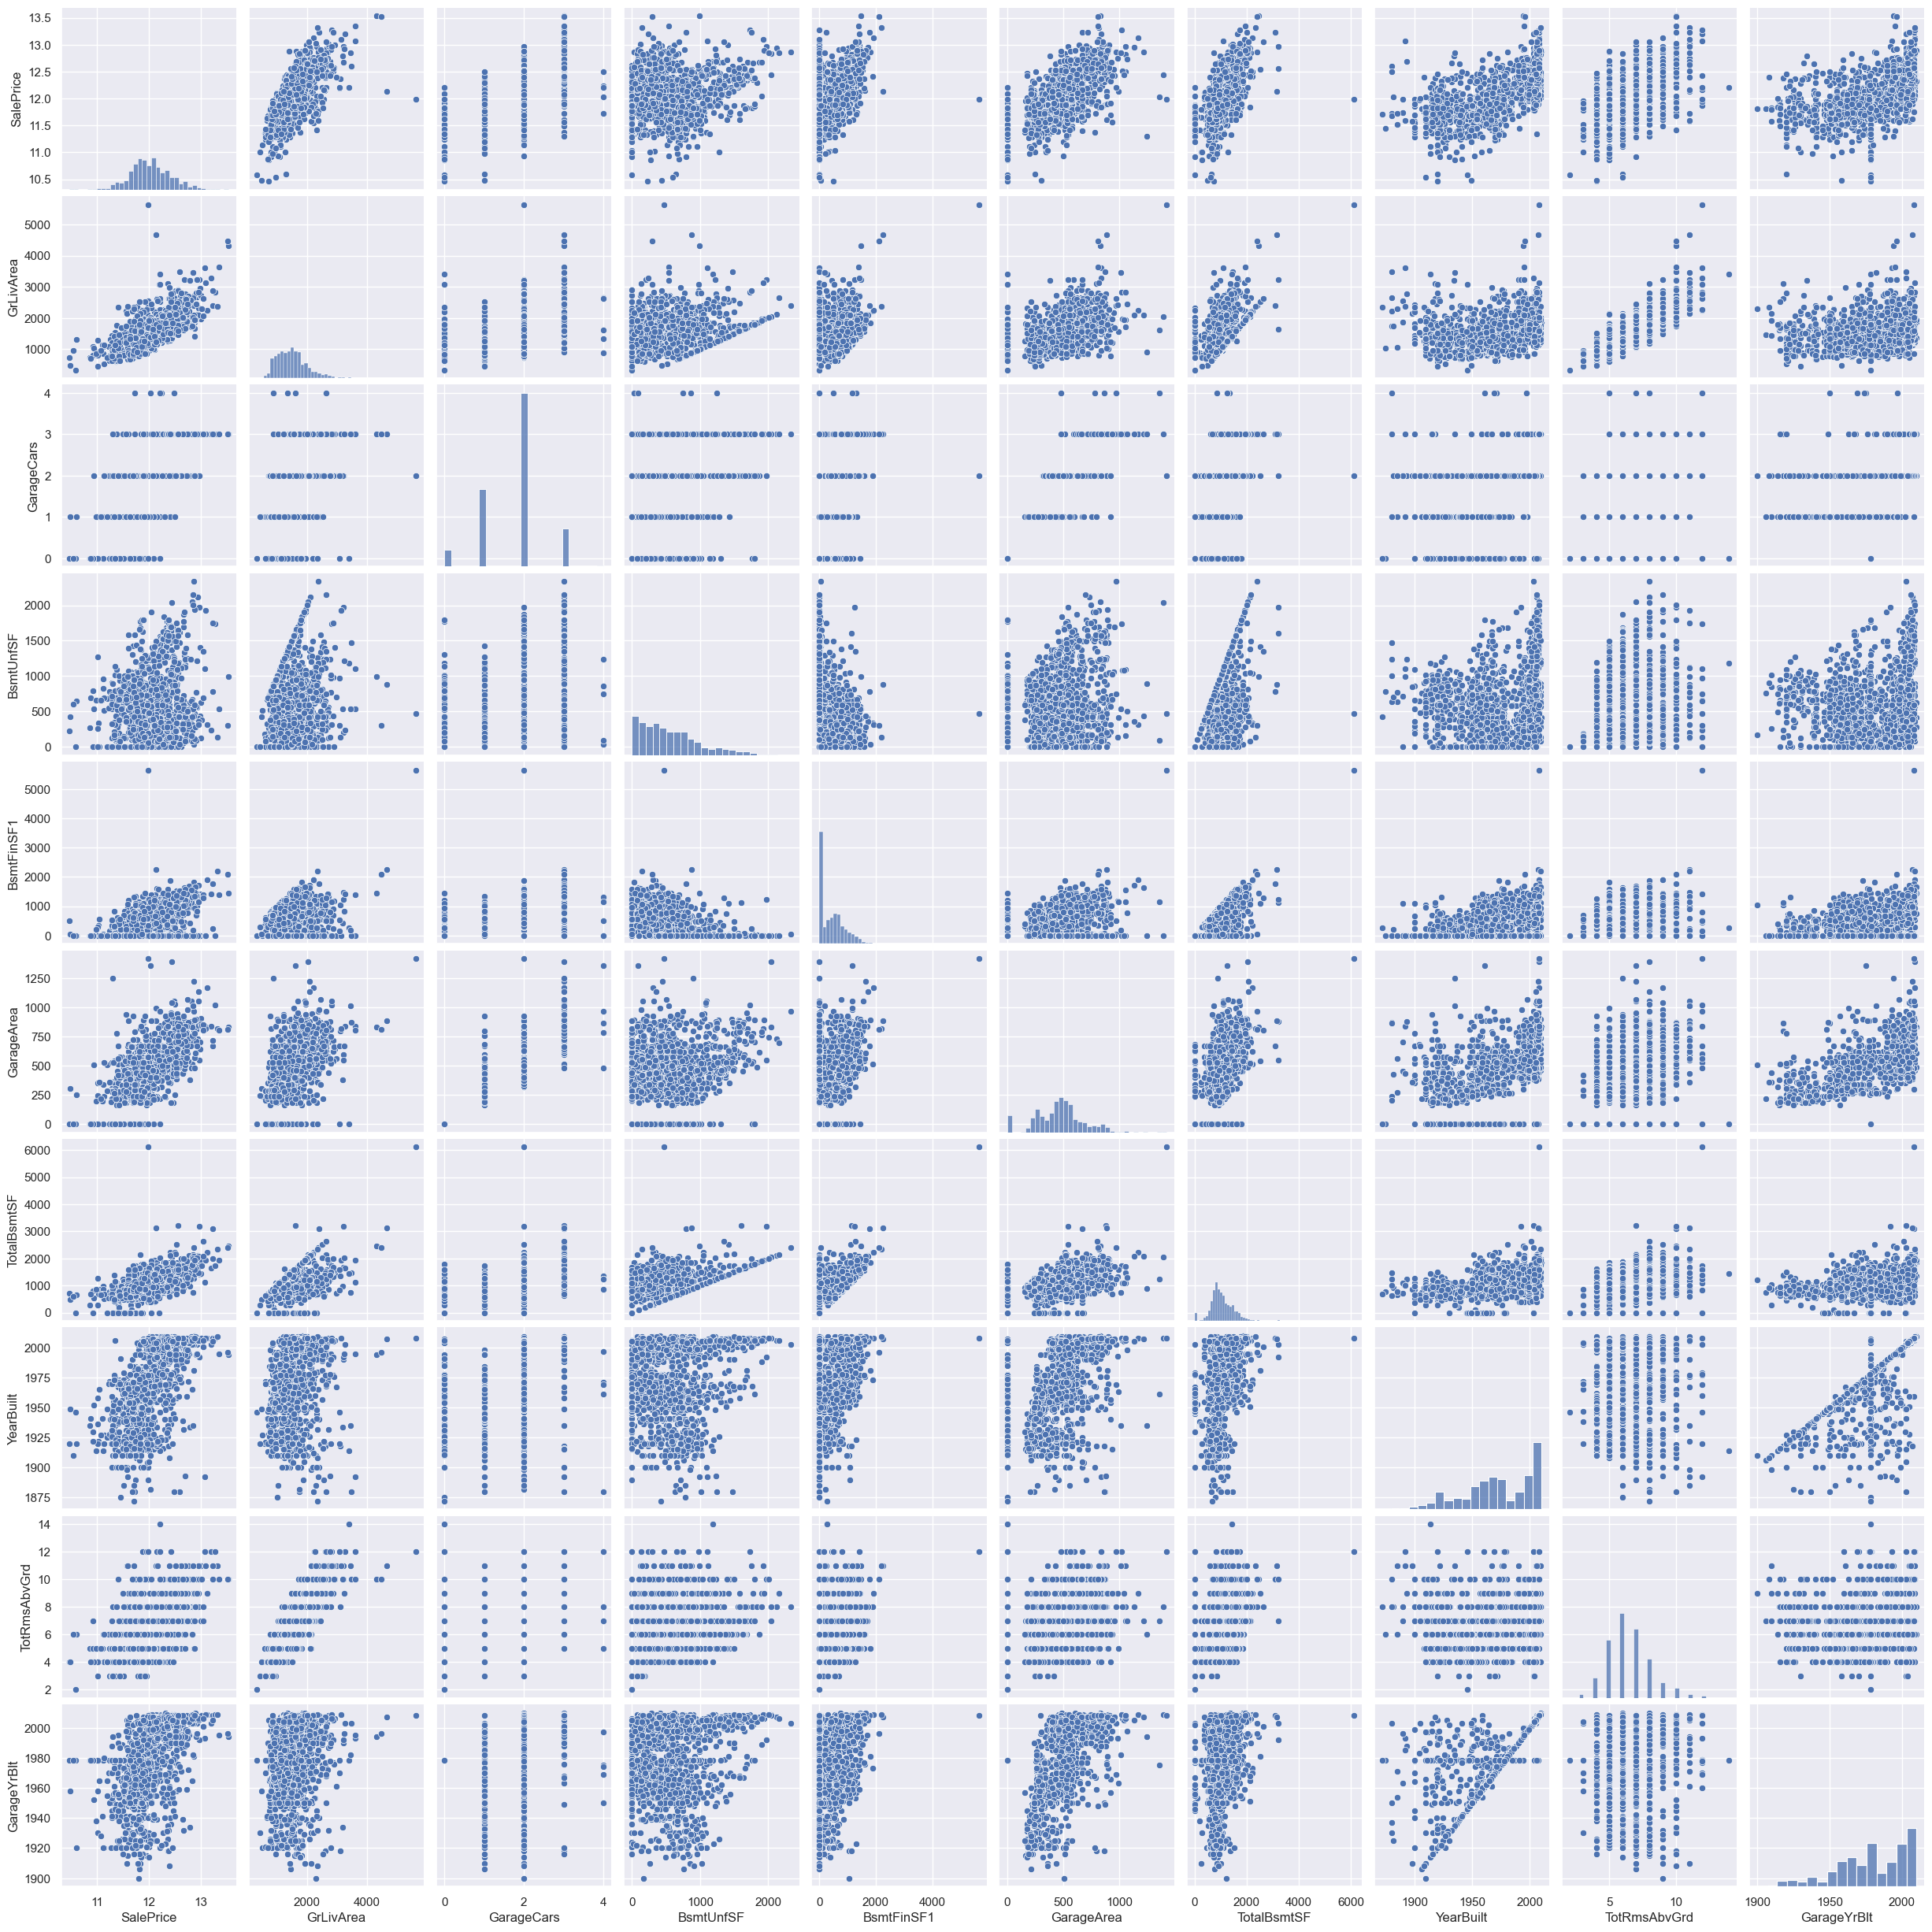

In [25]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

### Remove columns that are not correlated to SalePrice

In [26]:
train = train.drop(['GarageCars'], axis = 1)
train = train.drop(['BsmtUnfSF'], axis = 1)
train = train.drop(['TotRmsAbvGrd'], axis = 1)
train = train.drop(['GarageYrBlt'], axis = 1)    

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247699  
1   2007        WD         Normal  12.109016  
2   2008        WD         Normal  12.317171  
3   2006        WD        Abnorml  11.849405  
4   2008        WD         Normal  12.429220  

[5 rows x 77 columns]

In [27]:
#Numeric columns
train.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008  12.247699  
1          5    2007  12.109016  
2          9    2008  12.317171  
3          2    2006  11.849405  
4         12    2008  12.429220  
...      ...     ...        ...  
1455       8    2007  12.072547  
1456       2    2010  12.254868  
1457       5    2010  12.493133  
1458       4    2010  11.864469  
1459       6    2008  11.901590  

[1460 rows x 34 columns]

In [28]:
# Removing some outliers on lower right side of 'GrLivArea'
train = remove_outliers(train,'GrLivArea')

### Since the dataset is small it isn't advisable to do remove outliers.

In [29]:
train.shape

(1429, 77)

In [30]:
train = train.drop(['MoSold'], axis = 1)
train = train.drop(['YrSold'], axis = 1)
train = train.drop(['YearBuilt'], axis = 1)
train = train.drop(['YearRemodAdd'], axis = 1)
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... 3SsnPorch ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub  ...         0           0        0    NaN   NaN   
1         Lvl    AllPub  ...         0           0        0    NaN   NaN   
2         Lvl    AllPub  ...         0           0        0    NaN   NaN   
3         Lvl    AllPub  ...         0           0        0    NaN   NaN   
4         Lvl    AllPub  ...         0           0        0    NaN   NaN   

  MiscFeature MiscVal  SaleType  SaleCondition  SalePrice  
0         NaN       0        WD         Normal  12.247699  
1         NaN       0        WD         Normal  12.109016  
2         NaN       0        WD         Normal  12.317171  
3         NaN       0        WD        Abnorml  11.849405  
4         NaN       0        WD         Normal  12.429220  

[5 rows x 73 columns]

In [31]:
# We can also drop columns that show very low variance and thus not required for predictions
train = train.drop(['Street'], axis = 1)
train = train.drop(['Utilities'], axis = 1)

In [32]:
 train = train.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


### These Columns were having high null values and low variance, so dropping

In [33]:
train.shape

(1429, 62)

## Data Preparation 


In [34]:
# Drop 'Id' from Dataframe

train = train.drop(['Id'], axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... WoodDeckSF OpenPorchSF  \
0       Gtl      CollgCr       Norm  ...          0          61   
1       Gtl      Veenker      Feedr  ...        298           0   
2       Gtl      CollgCr       Norm  ...          0          42   
3       Gtl      Crawfor       Norm  ...          0          35   
4       Gtl      NoRidge       Norm  ...        192          84   

   EnclosedPorch  3SsnPorch ScreenPorch PoolArea MiscFeature SaleType  \
0              0          0           0        0         NaN       WD   
1              0          0           0        0         NaN       WD   
2              0          0           0        0         NaN       WD   
3            272          0           0        0         NaN       WD   
4              0          0           0        0         NaN       WD   

   SaleCondition  SalePrice  
0         Normal  12.247699  
1         Normal  12.109016  
2         Normal  12.317171  
3        Abnorml  11.849405  
4         Normal  12.429220  

[5 rows x 61 columns]

In [35]:
#type of each feature in data: int, float, object
types = train.dtypes
#numerical values are either type int or float
numeric = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical = types[types == object]

In [36]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      25
float64     3
Name: 0, dtype: int64

In [37]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']


In [38]:
#Categorical columns
categorical_columns = list(categorical.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Dummy Variable

In [39]:
train = pd.get_dummies(train, drop_first=True )
train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 199 columns]

In [40]:
X = train.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 198 columns]

In [41]:
# Putting response variable to y
y = train['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [42]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']])



In [45]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.765800  0.154684     2.241710    -0.513939    1.143458   
1070   -0.869945     0.139182 -0.020017    -0.764271    -0.513939    0.150609   
513    -0.869945     0.090980 -0.115156    -0.012775    -0.513939   -0.567112   
467     0.324542     0.476591 -0.086269    -0.764271     1.258264    0.772635   
993     0.085645    -0.053624 -0.148775    -0.012775    -0.513939   -0.567112   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
11      1.323938   -0.300737     0.345478  0.113320  ...               0   
1070    0.360916   -0.300737     0.030191 -0.267693  ...               0   
513    -0.223442   -0.300737     0.119563 -0.176705  ...               0   
467    -0.106571   -0.300737    -0.764234 -0.722635  ...               0   
993    -1.008820   -0.300737    -0.709617 -1.115022  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
11                 0             1             0            0   
1070               0             0             0            1   
513                0             0             0            1   
467                0             0             0            1   
993                0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
11                        0                     0                     0   
1070                      0                     0                     0   
513                       0                     0                     0   
467                       0                     0                     0   
993                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
11                       0                      1  
1070                     1                      0  
513                      1                      0  
467                      1                      0  
993                      0                      1  

[5 rows x 198 columns]

In [46]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.506528  -0.339155     0.620334     3.325664   
335     3.002345    -0.000325  17.009026    -0.825989     0.435637   
200    -0.851246     0.500846  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.000325   0.068493    -0.102827     1.398980   
1003    0.735527    -0.000325   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
461    -0.613073   -0.211663    0.997135    -1.205047 -1.556925  ...   
335    -0.613073    1.881258    0.620602     1.075768  1.258064  ...   
200    -0.613073   -1.026482   -0.257974     0.157612 -0.084718  ...   
214     0.267617   -0.146477   -0.257974    -0.891708 -1.249541  ...   
1003    0.330935   -1.026482   -0.257974     1.515413  1.422541  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
461                0               0             0             0            1   
335                0               0             0             0            1   
200                0               0             0             0            1   
214                0               0             0             0            1   
1003               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
461                       0                     0                     0   
335                       0                     0                     0   
200                       0                     0                     0   
214                       0                     0                     0   
1003                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
461                      1                      0  
335                      1                      0  
200                      1                      0  
214                      1                      0  
1003                     1                      0  

[5 rows x 198 columns]

In [47]:
train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 199, dtype: int64

In [48]:
null = pd.DataFrame(round(train.isnull().sum()/len(train.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Empty DataFrame
Columns: [Null %]
Index: []

## 3. Model Building and Evaluation

## Linear Regression and RFE 

In [49]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [50]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm,step = 100)            
rfe = rfe.fit(X_train, y_train)

In [51]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 2),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 2),
 ('FullBath', False, 2),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', False, 2),
 ('Fireplaces', False, 2),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', False, 2),
 ('3SsnPorch', False, 2),
 ('ScreenPorch', False, 2),
 ('PoolArea', False, 2),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 2),
 ('LotShape_IR3', False, 2),
 ('LotShape_Reg', False, 2),
 ('LandContour_HLS', False, 2),
 ('LandContour_Low', False, 2),
 ('LandContour_

In [52]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st

In [53]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside',
       'LandSlope_Mod', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_PosA', 'Condition1_RRAe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'E

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
X_train_rfe = pd.DataFrame(X_train[col])

In [56]:
X_train_rfe.head()

OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11       2.241710    -0.513939     0.345478  0.113320  1.995226     -0.111211   
1070    -0.764271    -0.513939     0.030191 -0.267693 -0.769750     -0.111211   
513     -0.012775    -0.513939     0.119563 -0.176705 -0.769750     -0.111211   
467     -0.764271     1.258264    -0.764234 -0.722635  1.060654     -0.111211   
993     -0.012775    -0.513939    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  GarageQual_Po  \
11     1.923409            0            0            1  ...              0   
1070  -0.932170            0            0            1  ...              0   
513   -0.860557            0            0            1  ...              0   
467    0.401627            0            0            1  ...              0   
993    0.079368            0            0            1  ...              0   

      GarageQual_TA  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_New  \
11                1             0             0               0             1   
1070              1             0             0               0             0   
513               1             0             0               0             0   
467               1             0             0               0             0   
993               1             0             0               0             1   

      SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  \
11               0                      0                     0   
1070             0                      0                     1   
513              0                      0                     1   
467              0                      0                     1   
993              0                      0                     0   

      SaleCondition_Partial  
11                        1  
1070                      0  
513                       0  
467                       0  
993                       1  

[5 rows x 99 columns]

In [57]:
X_train_rfe.shape

(1000, 99)

In [59]:
# predict
import sklearn.metrics as metrics
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9376150204220144

In [60]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.7478450779927072e+16

## Since the Test R2 is too low, we will check for some alternate methods of Regression

In [61]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 2),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 2),
 ('FullBath', False, 2),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', False, 2),
 ('Fireplaces', False, 2),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', False, 2),
 ('3SsnPorch', False, 2),
 ('ScreenPorch', False, 2),
 ('PoolArea', False, 2),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 2),
 ('LotShape_IR3', False, 2),
 ('LotShape_Reg', False, 2),
 ('LandContour_HLS', False, 2),
 ('LandContour_Low', False, 2),
 ('LandContour_

In [62]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st

In [63]:
X_test_rfe = X_test[col1]

In [64]:
X_test_rfe.head()

OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
461      0.620334     3.325664    -1.205047 -1.556925  0.506037      -0.09698   
335     -0.825989     0.435637     1.075768  1.258064 -0.435654      -0.09698   
200     -1.549150    -0.527705     0.157612 -0.084718 -0.835813      -0.09698   
214     -0.102827     1.398980    -0.891708 -1.249541  0.848688      -0.09698   
1003    -0.825989     0.435637     1.515413  1.422541 -0.835813      -0.09698   

      GrLivArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  GarageQual_Po  \
461   -0.813247            0            0            1  ...              0   
335    0.616745            0            0            1  ...              0   
200   -0.843999            0            0            0  ...              0   
214   -0.248718            0            0            1  ...              0   
1003   0.383905            0            0            1  ...              0   

      GarageQual_TA  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_New  \
461               1             0             0               0             0   
335               1             0             0               0             0   
200               1             0             0               0             0   
214               1             0             0               0             0   
1003              1             0             0               0             0   

      SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  \
461              0                      0                     1   
335              0                      0                     1   
200              0                      0                     1   
214              0                      0                     1   
1003             0                      0                     1   

      SaleCondition_Partial  
461                       0  
335                       0  
200                       0  
214                       0  
1003                      0  

[5 rows x 99 columns]

##  Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

### Lasso Regression

In [65]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 198)
y_train (1000,)


In [68]:
# Applying Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.105840      0.012796         0.003790        0.001322      0.0001   
1       0.019597      0.001456         0.003410        0.000475       0.001   
2       0.009364      0.000498         0.003000        0.000007        0.01   
3       0.008474      0.000439         0.003586        0.000471        0.05   
4       0.009554      0.001378         0.003670        0.000853         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.090694          -0.083496          -0.087401   
1   {'alpha': 0.001}          -0.086557          -0.089150          -0.090821   
2    {'alpha': 0.01}          -0.100963          -0.100709          -0.106230   
3    {'alpha': 0.05}          -0.135321          -0.122438          -0.140469   
4     {'alpha': 0.1}          -0.175003          -0.152448          -0.171398   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.086040  ...        -0.085660        0.003409                1   
1          -0.085576  ...        -0.087651        0.002003                2   
2          -0.100457  ...        -0.100653        0.003586                3   
3          -0.121741  ...        -0.128421        0.007908                4   
4          -0.147308  ...        -0.159305        0.011519                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.067489           -0.068760           -0.067159   
1           -0.079690           -0.079814           -0.078403   
2           -0.097495           -0.096807           -0.095827   
3           -0.127894           -0.126987           -0.125351   
4           -0.159632           -0.158985           -0.156348   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.067886           -0.068537         -0.067966         0.000607  
1           -0.080290           -0.078688         -0.079377         0.000714  
2           -0.097070           -0.097152         -0.096870         0.000566  
3           -0.126327           -0.127404         -0.126793         0.000885  
4           -0.156885           -0.160237         -0.158417         0.001532  

[5 rows x 21 columns]

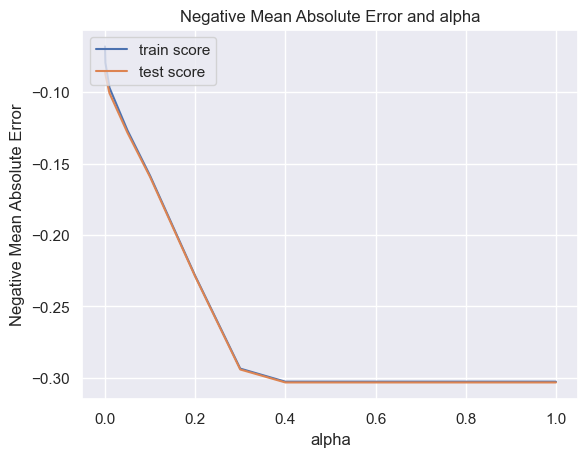

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter, 
#### but we will choose a low value of alpha to balance the trade-off between Bias-Variance 
#### and to get the coefficients of smallest of features.

In [71]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.01376488,  0.01313416,  0.13785229,  0.03187656,
        0.        ,  0.04019677,  0.        ,  0.04304567,  0.0085849 ,
        0.        , -0.00128819,  0.08934906,  0.01210007,  0.        ,
        0.02121185,  0.01768676, -0.        , -0.01554434,  0.01902882,
        0.04765256,  0.01269795,  0.        , -0.00724592,  0.        ,
        0.00151305,  0.        ,  0.        ,  0.        ,  0.03452706,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.  

#### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [72]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.961),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.014),
 ('LotArea', 0.013),
 ('OverallQual', 0.138),
 ('OverallCond', 0.032),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.04),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.043),
 ('1stFlrSF', 0.009),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.089),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.021),
 ('HalfBath', 0.018),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.016),
 ('Fireplaces', 0.019),
 ('GarageArea', 0.048),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.007),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.002),
 ('PoolArea', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.035),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0),
 ('LotCon

In [73]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8738335345608241
0.8793268062381543


In [74]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13137289606722863


In [75]:
#### The R2 values for Train and Test matches well, indicating an optimum model

In [76]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [77]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.961
1   MSSubClass  -0.000
2  LotFrontage   0.014
3      LotArea   0.013
4  OverallQual   0.138

In [78]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0          constant  11.961
4       OverallQual   0.138
13        GrLivArea   0.089
21       GarageArea   0.048
9       TotalBsmtSF   0.043
..              ...     ...
158    HeatingQC_TA  -0.002
24    EnclosedPorch  -0.007
138     BsmtQual_TA  -0.011
166  KitchenQual_TA  -0.013
19     KitchenAbvGr  -0.016

[199 rows x 2 columns]

In [79]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0             constant  11.961
4          OverallQual   0.138
13           GrLivArea   0.089
21          GarageArea   0.048
9          TotalBsmtSF   0.043
132   Foundation_PConc   0.042
7           BsmtFinSF1   0.040
30         MSZoning_RL   0.035
5          OverallCond   0.032
16            FullBath   0.021
20          Fireplaces   0.019
17            HalfBath   0.018
2          LotFrontage   0.014
22          WoodDeckSF   0.013
3              LotArea   0.013
14        BsmtFullBath   0.012
171  GarageType_Attchd   0.009
10            1stFlrSF   0.009
26         ScreenPorch   0.002
12        LowQualFinSF  -0.001
158       HeatingQC_TA  -0.002
24       EnclosedPorch  -0.007
138        BsmtQual_TA  -0.011
166     KitchenQual_TA  -0.013
19        KitchenAbvGr  -0.016

In [80]:
# These 25 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(25, 2)

In [81]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'Foundation_PConc', 'BsmtFinSF1', 'MSZoning_RL', 'OverallCond', 'FullBath', 'Fireplaces', 'HalfBath', 'LotFrontage', 'WoodDeckSF', 'LotArea', 'BsmtFullBath', 'GarageType_Attchd', '1stFlrSF', 'ScreenPorch', 'LowQualFinSF', 'HeatingQC_TA', 'EnclosedPorch', 'BsmtQual_TA', 'KitchenQual_TA', 'KitchenAbvGr']


In [82]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.765800      1.131973   
1070    0.360916   -0.918240 -0.020017     0.139182      1.131973   
513    -0.223442   -0.918240 -0.115156     0.090980     -0.816345   
467    -0.106571    2.231812 -0.086269     0.476591     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.053624     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

In [83]:
X_train_lasso.shape

(1000, 15)

In [84]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
461   -0.813247     0.620334     3.325664    -1.205047    0.530538   
335    0.616745    -0.825989     0.435637     1.075768    0.299231   
200   -0.843999    -1.549150    -0.527705     0.157612   -0.138775   
214   -0.248718    -0.102827     1.398980    -0.891708   -0.832694   
1003   0.383905    -0.825989     0.435637     1.515413    0.294310   

      BsmtFinSF1  Fireplaces    LotArea  LotFrontage  BsmtFullBath  \
461    -0.211663   -0.988037  -0.339155    -0.506528      1.073876   
335     1.881258    2.151725  17.009026    -0.000325      2.969732   
200    -1.026482   -0.988037  -0.190859     0.500846     -0.821980   
214    -0.146477   -0.988037   0.068493    -0.000325     -0.821980   
1003   -1.026482   -0.988037   0.134598    -0.000325     -0.821980   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
461                  1    -0.747921 -1.099305     -0.27671    1.165362  
335                  0    -0.747921  0.802316     -0.27671    4.227488  
200                  1     0.135073  0.802316     -0.27671    0.248203  
214                  0    -0.251236 -1.099305     -0.27671   -0.728127  
1003                 0    -0.747921  0.802316     -0.27671   -0.728127

## Ridge Regression

In [85]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010488      0.005773         0.003103        0.000991      0.0001   
1       0.006982      0.000648         0.003783        0.000397       0.001   
2       0.008879      0.000820         0.004010        0.000042        0.01   
3       0.007679      0.000869         0.003817        0.000404        0.05   
4       0.009367      0.000488         0.003917        0.000200         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098922          -0.084259          -0.092928   
1   {'alpha': 0.001}          -0.098904          -0.084259          -0.092900   
2    {'alpha': 0.01}          -0.098729          -0.084255          -0.092646   
3    {'alpha': 0.05}          -0.098044          -0.084245          -0.091795   
4     {'alpha': 0.1}          -0.097362          -0.084325          -0.091091   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.094413  ...        -0.090696        0.006127               26   
1          -0.094388  ...        -0.090681        0.006119               25   
2          -0.094144  ...        -0.090535        0.006039               24   
3          -0.093202  ...        -0.089973        0.005768               23   
4          -0.092250  ...        -0.089434        0.005528               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.065370           -0.067645           -0.064977   
1           -0.065371           -0.067645           -0.064979   
2           -0.065387           -0.067646           -0.065010   
3           -0.065504           -0.067651           -0.065174   
4           -0.065667           -0.067662           -0.065350   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.066443           -0.067084         -0.066304         0.001006  
1           -0.066444           -0.067087         -0.066305         0.001006  
2           -0.066454           -0.067114         -0.066322         0.000999  
3           -0.066500           -0.067216         -0.066409         0.000953  
4           -0.066555           -0.067317         -0.066510         0.000899  

[5 rows x 21 columns]

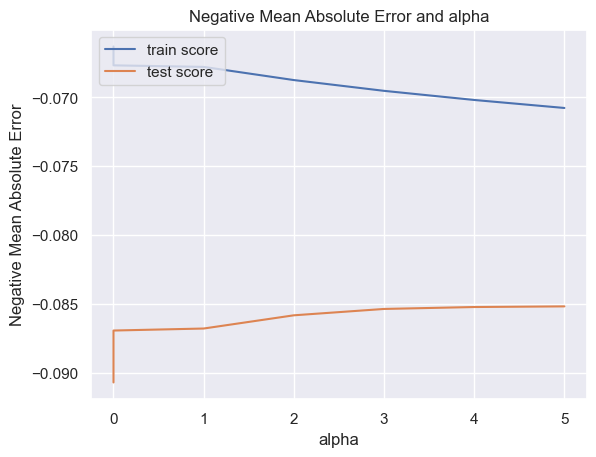

In [87]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [88]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01763549,  0.00797717,  0.02307053,  0.07313868,  0.04255296,
       -0.0029022 ,  0.02824885,  0.00633816,  0.04141737,  0.03467549,
        0.04633923,  0.0044073 ,  0.07051948,  0.01145899, -0.00113576,
        0.01377529,  0.01713483,  0.00094944, -0.00786752,  0.00559189,
        0.02596068,  0.01402374, -0.00258292,  0.00723457,  0.0052503 ,
        0.01261104,  0.01016576,  0.15659555,  0.11419086,  0.13052559,
        0.10570983,  0.00608329, -0.01492575, -0.00246275,  0.01769167,
       -0.0210553 ,  0.00445933,  0.01989975, -0.02152252, -0.05174801,
       -0.02270124,  0.00799202, -0.04174168, -0.01940611, -0.02801774,
       -0.0160776 ,  0.04544088,  0.00804371,  0.09032497, -0.06102272,
        0.00849826, -0.10843056, -0.13094414, -0.02521753, -0.02322612,
        0.03753019, -0.0141729 ,  0.04900129,  0.05400596, -0.08613126,
       -0.07857461, -0.00775889,  0.01899808,  0.04097411,  0.09406928,
        0.00876603,  0.05040192,  0.01715675,  0.07396486, -0.02

In [89]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.622),
 ('MSSubClass', -0.018),
 ('LotFrontage', 0.008),
 ('LotArea', 0.023),
 ('OverallQual', 0.073),
 ('OverallCond', 0.043),
 ('MasVnrArea', -0.003),
 ('BsmtFinSF1', 0.028),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', 0.041),
 ('1stFlrSF', 0.035),
 ('2ndFlrSF', 0.046),
 ('LowQualFinSF', 0.004),
 ('GrLivArea', 0.071),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.014),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.006),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.007),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.01),
 ('MSZoning_FV', 0.157),
 ('MSZoning_RH', 0.114),
 ('MSZoning_RL', 0.131),
 ('MSZoning_RM', 0.106),
 ('LotShape_IR2', 0.006),
 ('LotShape_IR3', -0.015),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.018),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.004),
 ('LotConfig_CulDSac', 0.02),
 ('LotConfig_FR2', -0.0

In [90]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9341611823934384
0.9104572005110202


In [91]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11316593198914252


#### It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

In [92]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [93]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.622
28             MSZoning_FV   0.157
30             MSZoning_RL   0.131
29             MSZoning_RH   0.114
31             MSZoning_RM   0.106
198  SaleCondition_Partial   0.102
65    Neighborhood_StoneBr   0.094
49    Neighborhood_Crawfor   0.090
132       Foundation_PConc   0.077
197   SaleCondition_Normal   0.076
69         Condition1_Norm   0.074
4              OverallQual   0.073
13               GrLivArea   0.071
159           CentralAir_Y   0.067
194  SaleCondition_AdjLand   0.063
94     Exterior1st_BrkFace   0.063
188         SaleType_ConLD   0.061
171      GarageType_Attchd   0.059
169         FireplaceQu_Po   0.057
73         Condition1_RRAn   0.056

In [94]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0               constant  11.622
28           MSZoning_FV   0.157
30           MSZoning_RL   0.131
29           MSZoning_RH   0.114
31           MSZoning_RM   0.106
..                   ...     ...
60  Neighborhood_OldTown  -0.086
93   Exterior1st_BrkComm  -0.100
52   Neighborhood_IDOTRR  -0.108
82     HouseStyle_2.5Fin  -0.112
53  Neighborhood_MeadowV  -0.131

[199 rows x 2 columns]

In [95]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0               constant  11.622
28           MSZoning_FV   0.157
30           MSZoning_RL   0.131
29           MSZoning_RH   0.114
31           MSZoning_RM   0.106
..                   ...     ...
60  Neighborhood_OldTown  -0.086
93   Exterior1st_BrkComm  -0.100
52   Neighborhood_IDOTRR  -0.108
82     HouseStyle_2.5Fin  -0.112
53  Neighborhood_MeadowV  -0.131

[194 rows x 2 columns]

In [96]:
predRFE.shape

(194, 2)

### Observation:
#### Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, 
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
#### the predictive variables.
#### It is always advisable to use simple yet robust model.

#### Equation can be formulated using the features and coefficients obtained by Lasso

### These are the final features that should be selected for predicting the price of house

### INFERENCE


#### Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

#### The higher values of positive coeeficients suggest a high sale value.

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  GarageArea   |Size of garage in square feet  |
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |
    

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

